<a href="https://colab.research.google.com/github/42697387/Aprendizaje-Automatico-1/blob/main/TP4_FINAL_HerediaMartin_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1 / TP4

**Martin Gaspar Hredia**

DNI: 42.697.387

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

## **Instrucciones**:

## **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  

---

#**01-SELECCIÓN DEL DATASET**

### ✅ Dataset elegido


Este notebook aplica un modelo de regresión lineal al dataset **"Real Estate Valuation**"
del ***UCI ML Repository*** para predecir el precio por unidad de área. Incluye análisis
exploratorio, preprocesamiento, entrenamiento del modelo, evaluación e interpretación
de la importancia de las variables.


### 📌 Punto 1 - Carga y preparación inicial del dataset "Real Estate Valuation"

### 🧩 1. Instalación de librerías necesarias (si no están instaladas)

In [ ]:
# : Aseguramos que la librería ucimlrepo esté instalada en el entorno de Colab.
# --quiet evita que se muestre la salida detallada de la instalación.

!pip install ucimlrepo --quiet

### 🧠 2. Importación de librerías y configuraciones generales

In [ ]:
# Objetivo: Cargar todas las herramientas (librerías) necesarias para el análisis
# y configurar algunas opciones para mejorar la visualización de los datos.

# Importación de librerías fundamentales para manipulación de datos y numéricos
import pandas as pd  # Para trabajar con DataFrames (tablas de datos)
import numpy as np   # Para operaciones numéricas, especialmente arrays

# Importación de librerías para visualización
import matplotlib.pyplot as plt # Para crear gráficos estáticos
import seaborn as sns           # Para crear gráficos estadísticos más atractivos

# Importación de la función para descargar datasets de UCI
from ucimlrepo import fetch_ucirepo

# Importación de módulos específicos de Scikit-Learn para Machine Learning
from sklearn.model_selection import train_test_split # Para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler     # Para escalar/estandarizar variables numéricas
from sklearn.linear_model import LinearRegression    # El modelo de Regresión Lineal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Métricas para evaluar el modelo
from sklearn.inspection import permutation_importance # Para evaluar la importancia de variables

# Configuraciones opcionales para mejorar la visualización en Pandas y Numpy
plt.style.use('seaborn-v0_8-whitegrid') # Estilo visual para los gráficos
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Formato de números flotantes en Pandas (3 decimales)
pd.set_option('display.max_columns', None)                   # Muestra todas las columnas de los DataFrames
# np.set_printoptions(suppress=True, precision=4)              # Evita notación científica en Numpy y fija 4 decimales

# Módulo para mostrar DataFrames de forma más elegante en notebooks
from IPython.display import display

print("✅ Librerías importadas y configuraciones aplicadas.")

✅ Librerías importadas y configuraciones aplicadas.


### 📥 3. Carga del dataset desde UCI

In [ ]:
# Objetivo: Obtener los datos del repositorio UCI usando su ID.
# Se separa en características (X) y variable objetivo (y), y luego se unen
# en un DataFrame crudo (df_raw) para el análisis inicial.

df_raw = pd.DataFrame() # Inicializar df_raw vacío por si falla la carga

try:
    # Descargar el dataset con ID 477 ("Real Estate Valuation")
    real_estate_valuation = fetch_ucirepo(id=477)

    # Extraer las características (variables predictoras)
    X_raw_full = real_estate_valuation.data.features
    # Extraer la variable objetivo (precio por unidad de área)
    # Se accede directamente a la columna específica del target.
    y_raw = real_estate_valuation.data.targets['Y house price of unit area']

    # Combinar características y objetivo en un único DataFrame inicial
    # axis=1 indica que se unan como columnas.
    df_raw = pd.concat([X_raw_full, y_raw], axis=1)

    print("✅ Dataset cargado exitosamente desde ucimlrepo.")
    # .shape devuelve una tupla (número de filas, número de columnas)
    print(f"📊 Dimensiones iniciales del dataset: {df_raw.shape}")

except Exception as e:
    # Captura cualquier error durante la carga y muestra un mensaje informativo.
    print(f"❌ Error al cargar datos con ucimlrepo: {e}")
    print("💡 Verifica tu conexión a internet o considera descargar el archivo manualmente.")

✅ Dataset cargado exitosamente desde ucimlrepo.
📊 Dimensiones iniciales del dataset: (414, 7)


### 🧹 4. Limpieza de nombres de columnas para estandarizarlos

In [ ]:
# Objetivo: Estandarizar los nombres de las columnas para facilitar su uso.
# Se convierten a minúsculas y se reemplazan espacios por guiones bajos.

# Verificar si df_raw se cargó correctamente antes de proceder
if not df_raw.empty:
    print("\n📋 Nombres originales de columnas:")
    print(df_raw.columns) # Muestra la lista de nombres actuales

    # Aplicar una list comprehension para transformar cada nombre de columna:
    # col.strip() elimina espacios al inicio/final
    # .replace(' ', '_') reemplaza espacios internos por guiones bajos
    # .lower() convierte todo a minúsculas
    df_raw.columns = [col.strip().replace(' ', '_').lower() for col in df_raw.columns]

    print("\n✅ Nombres de columnas limpiados:")
    print(df_raw.columns) # Muestra los nuevos nombres
else:
    print("\n⚠️ El DataFrame df_raw está vacío. Saltando limpieza de nombres.")



📋 Nombres originales de columnas:
Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

✅ Nombres de columnas limpiados:
Index(['x1_transaction_date', 'x2_house_age',
       'x3_distance_to_the_nearest_mrt_station',
       'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude',
       'y_house_price_of_unit_area'],
      dtype='object')


### 4.1 Traducción de nombres de las columnas de ingles a español

In [ ]:
# Objetivo: Renombrar las columnas a español para mejorar la interpretabilidad

if not df_raw.empty:
    print("\n🔄 Traduciendo nombres de columnas a español...")

    # Diccionario original con posibles columnas
    column_mapping_es = {
        'no': 'id_registro',
        'x1_transaction_date': 'fecha_transaccion',
        'x2_house_age': 'antiguedad_casa',
        'x3_distance_to_the_nearest_mrt_station': 'distancia_estacion_mrt',
        'x4_number_of_convenience_stores': 'num_tiendas_conveniencia',
        'x5_latitude': 'latitud',
        'x6_longitude': 'longitud',
        'y_house_price_of_unit_area': 'precio_por_unidad_area'
    }

    # Filtrar solo las columnas que existen en df_raw
    columnas_existentes = {k: v for k, v in column_mapping_es.items() if k in df_raw.columns}

    # Aplicar el renombrado
    df_raw.rename(columns=columnas_existentes, inplace=True)
    print("✅ Nombres de columnas traducidos a español:")
    print(df_raw.columns)

    # Definir el nombre de la columna objetivo en español
    columna_objetivo = 'precio_por_unidad_area'
else:
    print("\n⚠️ El DataFrame df_raw está vacío. Saltando traducción de nombres.")



🔄 Traduciendo nombres de columnas a español...
✅ Nombres de columnas traducidos a español:
Index(['fecha_transaccion', 'antiguedad_casa', 'distancia_estacion_mrt',
       'num_tiendas_conveniencia', 'latitud', 'longitud',
       'precio_por_unidad_area'],
      dtype='object')


### 👁️‍🗨️ 5. Revisión general del dataset

In [ ]:
# Objetivo: Obtener una primera vista de los datos y su estructura después de la limpieza
# y traducción inicial.

# Verificar si df_raw se cargó y renombró correctamente
if not df_raw.empty and 'precio_por_unidad_area' in df_raw.columns: # Chequea si existe la columna objetivo traducida
    print("\n🔎 Primeras 5 filas del dataset (con nombres en español):")
    # display() es preferible a print() para DataFrames en notebooks
    display(df_raw.head())

    print("\n📌 Información general del DataFrame (tipos de datos y nulos):")
    # .info() muestra el tipo de dato de cada columna y la cantidad de valores no nulos.
    # Es útil para una detección rápida de tipos incorrectos o faltantes.
    df_raw.info()
else:
    print("\n⚠️ No se puede mostrar la revisión general (df_raw vacío o columnas no renombradas).")


🔎 Primeras 5 filas del dataset (con nombres en español):


,fecha_transaccion,antiguedad_casa,distancia_estacion_mrt,num_tiendas_conveniencia,latitud,longitud,precio_por_unidad_area
0,2012.917,32.000,84.879,10,24.983,121.540,37.900
1,2012.917,19.500,306.595,9,24.980,121.540,42.200
2,2013.583,13.300,561.985,5,24.987,121.544,47.300
3,2013.500,13.300,561.985,5,24.987,121.544,54.800
4,2012.833,5.000,390.568,5,24.979,121.542,43.100



📌 Información general del DataFrame (tipos de datos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fecha_transaccion         414 non-null    float64
 1   antiguedad_casa           414 non-null    float64
 2   distancia_estacion_mrt    414 non-null    float64
 3   num_tiendas_conveniencia  414 non-null    int64  
 4   latitud                   414 non-null    float64
 5   longitud                  414 non-null    float64
 6   precio_por_unidad_area    414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


---
#**02-ANÁLISIS EXPLORATORIO (PREVIO AL MODELADO)**


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  

### 📊 2. Análisis Exploratorio de Datos (EDA)
* ***Objetivo***: Calcular estadísticas descriptivas básicas para entender la escala, centro y dispersión de cada variable numérica. Se excluye la columna 'id_registro'.

* ***Introducción al Análisis Descriptivo:***
 Se busca obtener medidas como la media, desviación estándar, mínimo, máximo y cuartiles.
* ***Esto ayuda a identificar***:
 - Rango de valores de cada variable.
 - Posibles diferencias de escala entre variables.
 - Valores medios y dispersión (variabilidad).
 - Primeros indicios de posibles outliers (comparando media con mediana (50%), o min/max extremos).

### 📊 2.1 Descripción estadística

En esta sección realizamos un análisis descriptivo de las variables numéricas. Se calcularán medidas como media, desviación estándar, valores mínimos y máximos. Se excluye la columna `no` por ser un identificador.

Se busca observar:
- Valores atípicos (outliers)
- Rango de variación de cada feature
- Posibles problemas de escala

In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    print("\nResumen estadístico (excluyendo 'id_registro'):")
    try:
        # .drop() para quitar la columna 'id_registro'. axis=1 indica que es una columna.
        # errors='ignore' evita un error si la columna ya no existiera.
        # .describe() calcula las estadísticas descriptivas.
        # .T transpone la tabla para mejor legibilidad (estadísticas como filas).
        display(df_raw.drop('id_registro', axis=1, errors='ignore').describe().T)
    except Exception as e:
        print(f"❌ Ocurrió un error al calcular estadísticas descriptivas: {e}")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando descripción estadística.")


Resumen estadístico (excluyendo 'id_registro'):


,count,mean,std,min,25%,50%,75%,max
fecha_transaccion,414.000,2013.149,0.282,2012.667,2012.917,2013.167,2013.417,2013.583
antiguedad_casa,414.000,17.713,11.392,0.000,9.025,16.100,28.150,43.800
distancia_estacion_mrt,414.000,1083.886,1262.110,23.383,289.325,492.231,1454.279,6488.021
num_tiendas_conveniencia,414.000,4.094,2.946,0.000,1.000,4.000,6.000,10.000
latitud,414.000,24.969,0.012,24.932,24.963,24.971,24.977,25.015
longitud,414.000,121.533,0.015,121.474,121.528,121.539,121.543,121.566
precio_por_unidad_area,414.000,37.980,13.606,7.600,27.700,38.450,46.600,117.500


### 🔍 2.2 Verificación de valores faltantes

Es importante verificar si existen valores nulos en el dataset antes de aplicar modelos. En caso de encontrar valores faltantes, se deben tomar decisiones de imputación o eliminación.

En este caso, verificamos si alguna columna contiene valores nulos.

In [ ]:
if not df_raw.empty:
    print("\nConteo de valores faltantes por columna:")
    # .isnull() devuelve un DataFrame booleano (True si es nulo, False si no).
    # .sum() suma los True por columna (contando los nulos).
    missing_values = df_raw.isnull().sum()
    print(missing_values)

    # Comprobar si el total de valores faltantes es cero.
    if missing_values.sum() == 0:
        print("\n✅ ¡Excelente! No hay valores faltantes en el dataset.")
    else:
        print("\n⚠️ ¡Atención! Se encontraron valores faltantes. Se deberán tratar.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando verificación de valores faltantes.")


Conteo de valores faltantes por columna:
fecha_transaccion           0
antiguedad_casa             0
distancia_estacion_mrt      0
num_tiendas_conveniencia    0
latitud                     0
longitud                    0
precio_por_unidad_area      0
dtype: int64

✅ ¡Excelente! No hay valores faltantes en el dataset.


### 📈 2.3 Visualización de distribuciones - Histogramas
* Los histogramas agrupan los valores en rangos (bins) y muestran la frecuencia de cada rango.
* El `kde=True` añade una curva suavizada estimada de la densidad de probabilidad.
*Permiten detectar:
 - Sesgo (skewness): Asimetría hacia la izquierda o derecha.
 - Curtosis: Si la distribución es más picuda o aplanada que la normal.
 - Modalidad: Número de picos (unimodal, bimodal).


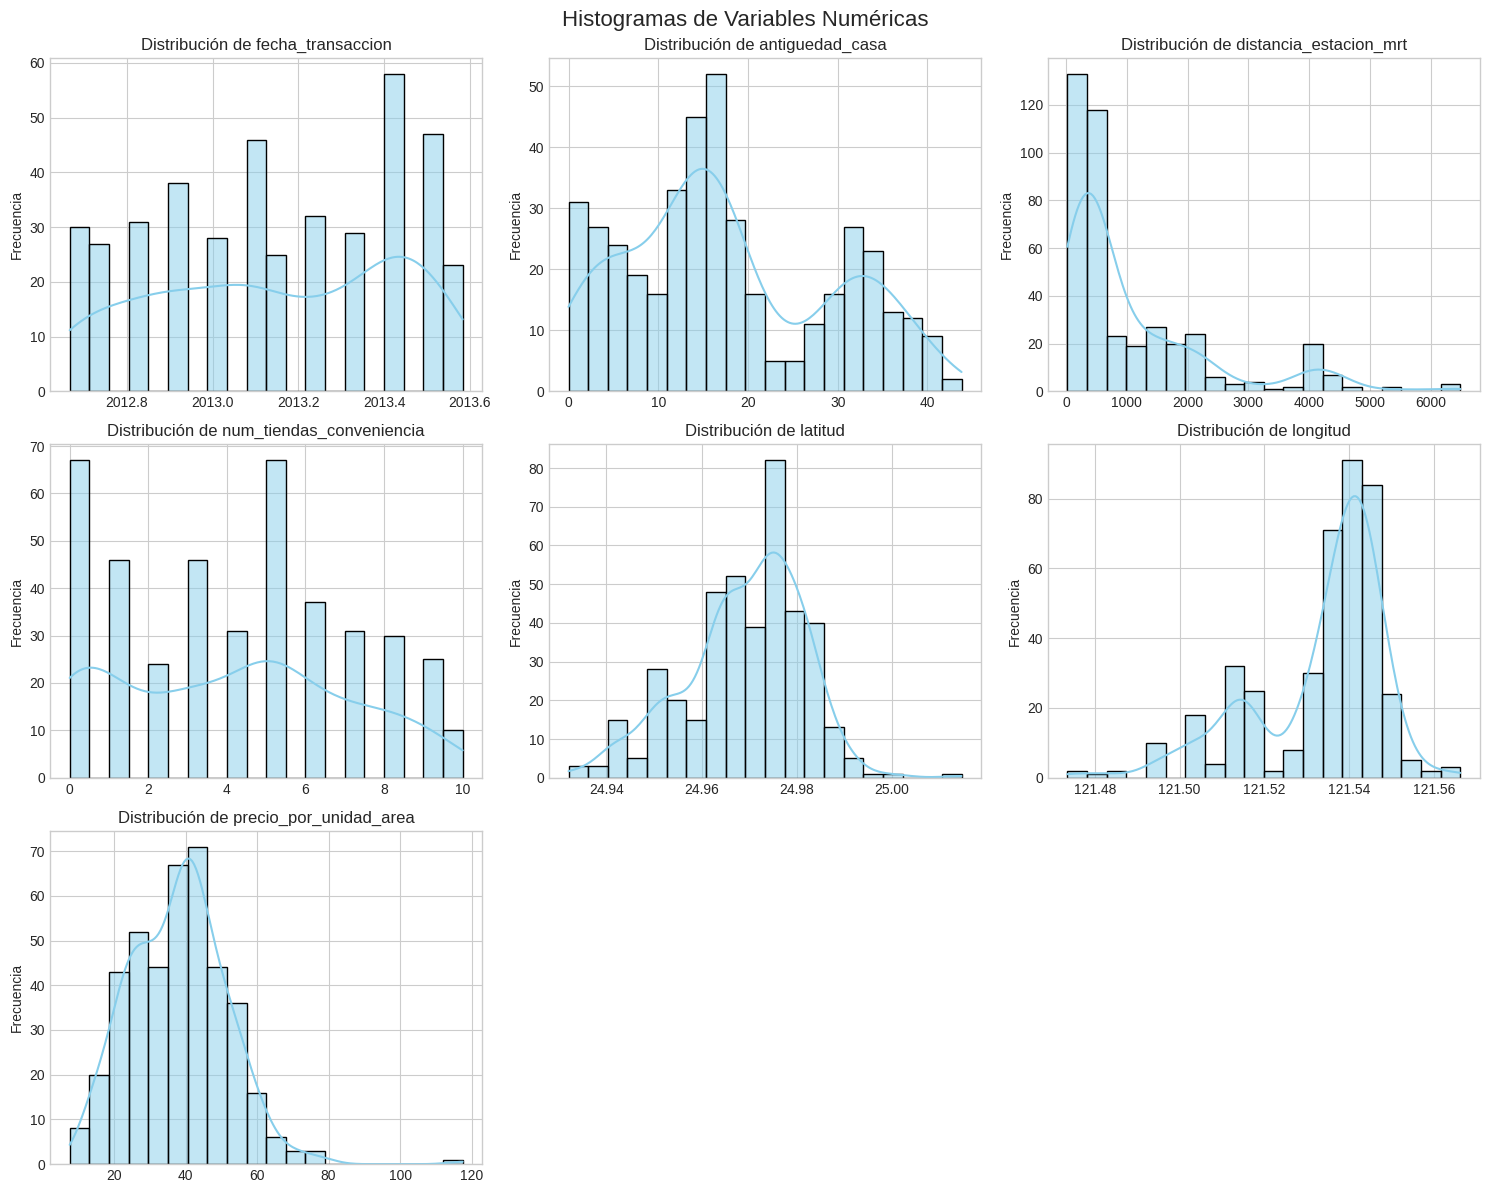

In [ ]:
# Importar 'math' si no se hizo antes, necesario para calcular filas/columnas del gráfico
import math

# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    # Seleccionar columnas numéricas, excluyendo 'id_registro'
    try:
        columnas_numericas_plot = df_raw.select_dtypes(include=np.number).columns.drop('id_registro', errors='ignore')
    except Exception as e:
        print(f"❌ Error seleccionando columnas numéricas: {e}")
        columnas_numericas_plot = pd.Index([]) # Crear índice vacío para evitar error posterior

    if not columnas_numericas_plot.empty:
        n_cols_plot = 3 # Número de columnas en la grilla de gráficos
        # Calcular el número de filas necesarias usando math.ceil (redondeo hacia arriba)
        n_rows_plot = math.ceil(len(columnas_numericas_plot) / n_cols_plot)

        # Crear la figura y los ejes (subplots)
        # figsize controla el tamaño total de la figura
        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
        # .flatten() convierte la matriz de ejes (axes) en un array 1D para iterar fácilmente
        axes = axes.flatten()

        # Iterar sobre las columnas numéricas y sus índices
        for i, col in enumerate(columnas_numericas_plot):
            # Usar sns.histplot para crear el histograma en el eje correspondiente (axes[i])
            # kde=True añade la curva de densidad
            # bins=20 define el número de barras (ajustable)
            sns.histplot(df_raw[col], kde=True, ax=axes[i], bins=20, color='skyblue')
            axes[i].set_title(f'Distribución de {col}') # Título del subplot
            axes[i].set_xlabel('') # Limpiar etiqueta eje X (opcional)
            axes[i].set_ylabel('Frecuencia') # Etiqueta eje Y

        # Ocultar ejes que no se usaron (si el número de plots no es múltiplo de n_cols_plot)
        for j in range(i + 1, len(axes)):
             fig.delaxes(axes[j]) # Elimina el subplot vacío

        plt.tight_layout() # Ajusta automáticamente el espaciado para evitar solapamientos
        plt.subplots_adjust(top=0.95) # Ajusta el margen superior para el título general
        plt.suptitle('Histogramas de Variables Numéricas', fontsize=16, y=0.99) # Título general
        plt.show() # Muestra el gráfico
    else:
        print("\n⚠️ No hay columnas numéricas adecuadas para graficar histogramas.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando histogramas.")

### 📦 2.4 Visualización de outliers - Boxplots

* Los boxplots resumen la distribución mostrando la mediana (línea central), los cuartiles Q1 y Q3 (la caja), y los "bigotes" que usualmente se extienden hasta 1.5 veces el Rango Intercuartílico (IQR = Q3 - Q1) desde la caja.
* Los puntos fuera de los bigotes se consideran posibles outliers.
* Son útiles para comparar distribuciones y detectar asimetrías y valores extremos.

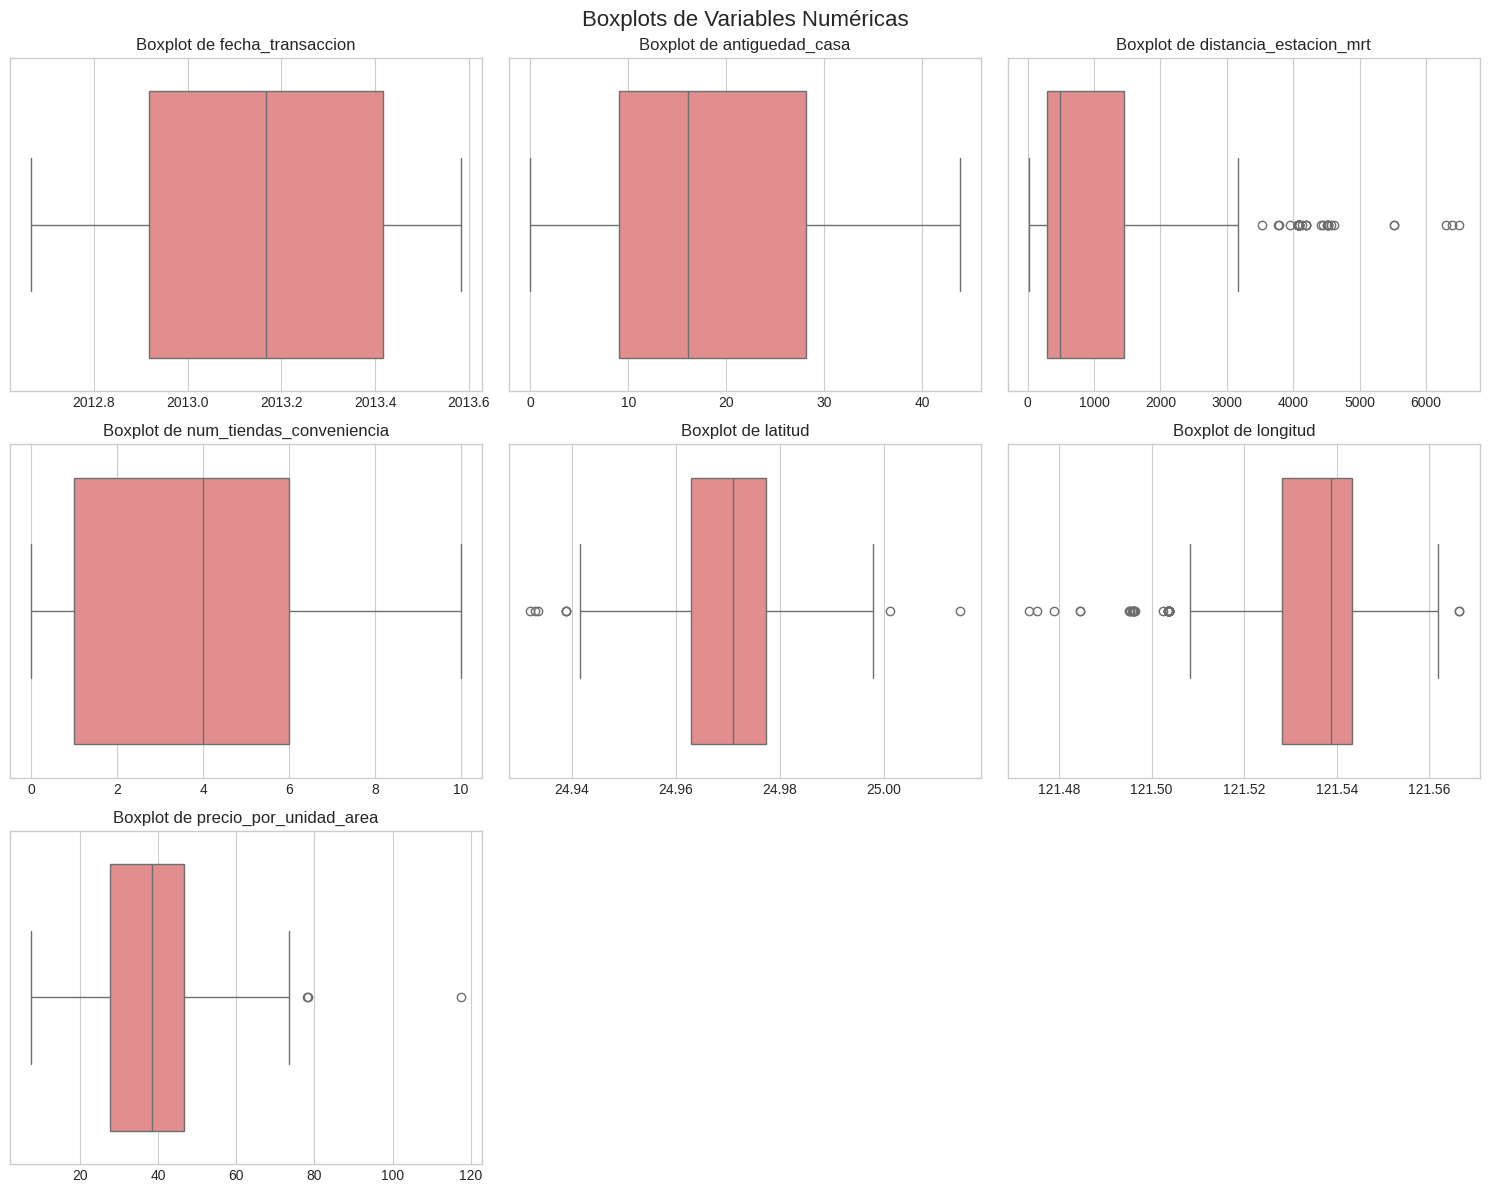

In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
     # Re-seleccionar columnas numéricas por si acaso (podría hacerse una sola vez antes)
    try:
        columnas_numericas_plot = df_raw.select_dtypes(include=np.number).columns.drop('id_registro', errors='ignore')
    except Exception as e:
        print(f"❌ Error seleccionando columnas numéricas: {e}")
        columnas_numericas_plot = pd.Index([])

    if not columnas_numericas_plot.empty:
        n_cols_plot = 3
        n_rows_plot = math.ceil(len(columnas_numericas_plot) / n_cols_plot)

        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
        axes = axes.flatten()

        i = 0 # Contador para saber cuántos plots se hicieron realmente
        for col in columnas_numericas_plot:
            # Usar sns.boxplot para crear el boxplot horizontal
            sns.boxplot(x=df_raw[col], ax=axes[i], color='lightcoral')
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_xlabel('') # Limpiar etiqueta eje X
            i += 1 # Incrementar contador solo si se hizo el plot

        # Ocultar ejes sobrantes usando el contador 'i'
        for j in range(i, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.suptitle('Boxplots de Variables Numéricas', fontsize=16, y=0.99)
        plt.show()
    else:
        print("\n⚠️ No hay columnas numéricas adecuadas para graficar boxplots.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando boxplots.")

### 🔄 2.5 Relación entre features y variable objetivo (scatterplots)
* **Objetivo**: Visualizar la relación entre cada variable predictora (feature) y la variable objetivo (target), buscando patrones lineales o no lineales.
* Los Scartterplots muestran la relación entre dos variables numéricas. Cada punto representa una observación.
* Son útiles para detectar:
   - Correlación lineal: Si los puntos tienden a seguir una línea recta (positiva o negativa).
   - Relaciones no lineales: Curvas, U invertida, etc.
   - Outliers bivariados: Puntos alejados del patrón general.
 - Heterocedasticidad: Si la dispersión de los puntos cambia a lo largo del eje X.
* Se excluye 'id_registro' y 'fecha_transaccion' (por no ser directamente interpretable numéricamente).



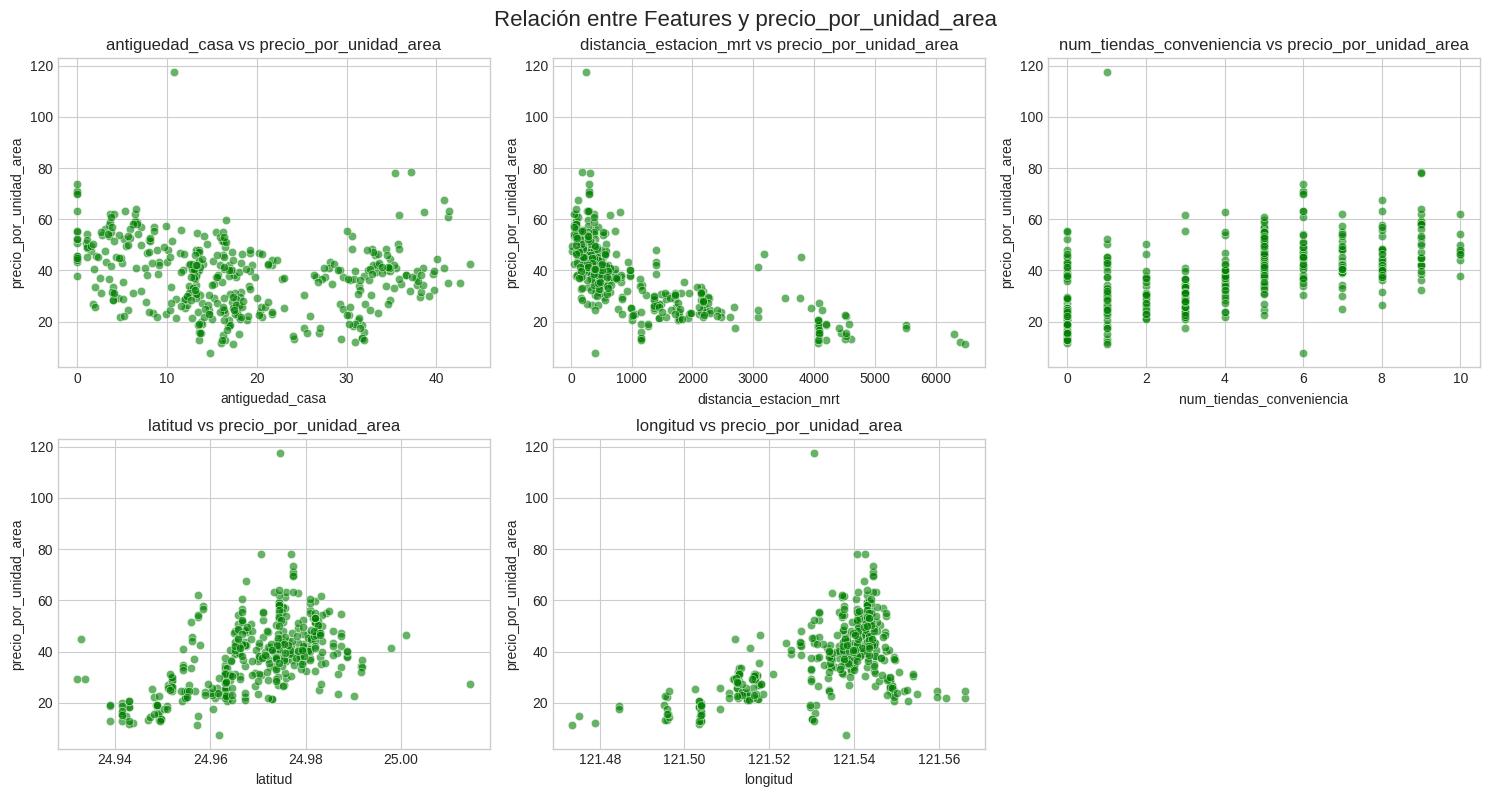

In [ ]:
# Verificar si df_raw existe y si la columna objetivo está presente
if not df_raw.empty and columna_objetivo in df_raw.columns:
    # Identificar las features a graficar (todas menos id, fecha y el propio target)
    features_para_scatter = df_raw.columns.drop(['id_registro', 'fecha_transaccion', columna_objetivo], errors='ignore')
    # Filtrar solo las numéricas por si acaso alguna no lo fuera
    features_para_scatter = df_raw[features_para_scatter].select_dtypes(include=np.number).columns

    if not features_para_scatter.empty:
        n_cols_plot = 3
        n_rows_plot = math.ceil(len(features_para_scatter) / n_cols_plot)

        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
        axes = axes.flatten()

        i = 0 # Contador
        for feature in features_para_scatter:
            # Usar sns.scatterplot
            # alpha=0.6 hace los puntos semitransparentes para ver superposiciones
            sns.scatterplot(data=df_raw, x=feature, y=columna_objetivo, ax=axes[i], alpha=0.6, color='green')
            axes[i].set_title(f'{feature} vs {columna_objetivo}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel(columna_objetivo)
            i += 1

        # Ocultar ejes sobrantes
        for j in range(i, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.subplots_adjust(top=0.93) # Más espacio para el título largo
        plt.suptitle(f'Relación entre Features y {columna_objetivo}', fontsize=16, y=0.99)
        plt.show()
    else:
        print("\n⚠️ No hay features numéricas adecuadas para graficar scatterplots con el target.")
else:
    print(f"\n❌ No se puede graficar scatterplots (df_raw vacío o columna '{columna_objetivo}' no encontrada).")


### 🧮 2.6 Matriz de correlación
Esta mide la fuerza y dirección de la relación lineal entre pares de variables.
* El coeficiente de correlación de Pearson varía entre -1 y +1:
   * +1: Correlación lineal positiva perfecta.
   *  -1: Correlación lineal negativa perfecta.
   *  0: Sin correlación lineal.

* Un heatmap (mapa de calor) es una excelente forma de visualizarla: colores intensos indican correlaciones fuertes.

* Se busca:
 - Correlaciones altas (positivas o negativas) entre features y el target (buenos predictores potenciales).
 - Correlaciones altas entre features (riesgo de multicolinealidad, donde una variable puede ser predicha por otra).

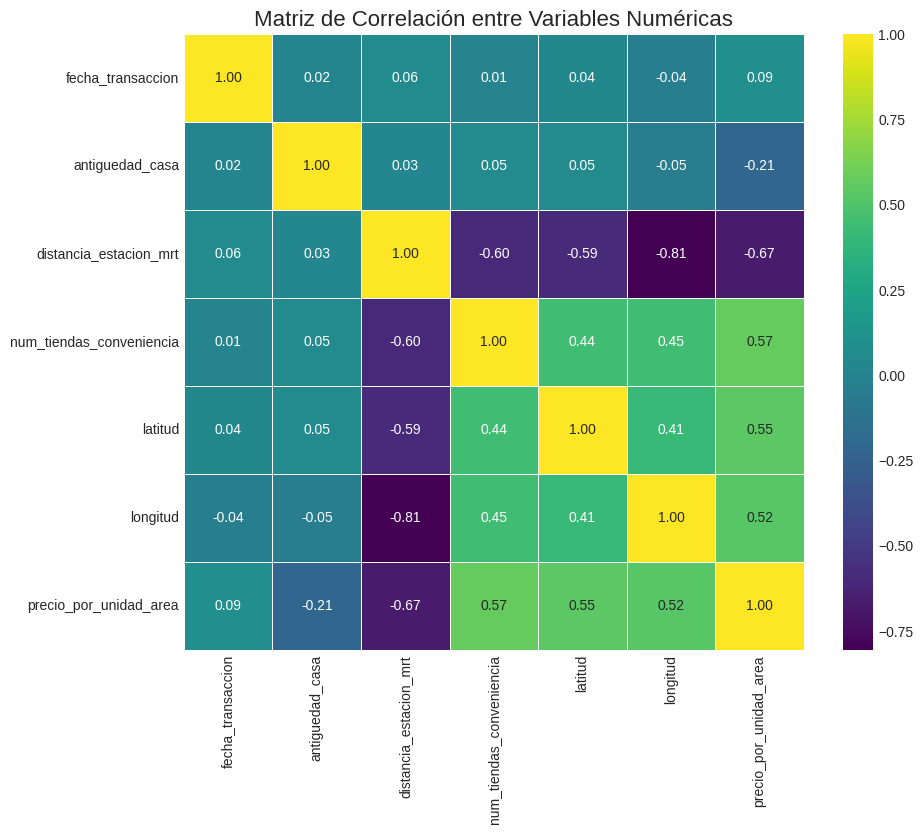


Correlación de features con 'precio_por_unidad_area':
num_tiendas_conveniencia    0.571
latitud                     0.546
longitud                    0.523
fecha_transaccion           0.087
antiguedad_casa            -0.211
distancia_estacion_mrt     -0.674
Name: precio_por_unidad_area, dtype: float64


In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    # Seleccionar solo columnas numéricas para el cálculo
    df_numeric = df_raw.select_dtypes(include=np.number).drop('id_registro', axis=1, errors='ignore')

    if len(df_numeric.columns) > 1: # Se necesitan al menos 2 columnas numéricas
        # Calcular la matriz de correlación
        corr_matrix = df_numeric.corr()

        # Visualizar la matriz con un heatmap
        plt.figure(figsize=(10, 8)) # Tamaño de la figura
        # annot=True muestra los valores de correlación en las celdas
        # cmap='viridis' define la paleta de colores
        # fmt=".2f" formatea los números a 2 decimales
        sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
        plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
        plt.show()

        # Mostrar correlación específica con la variable objetivo
        if columna_objetivo in corr_matrix.columns:
             print(f"\nCorrelación de features con '{columna_objetivo}':")
             # Seleccionar la columna del target, quitar la correlación consigo misma (drop)
             # y ordenar de mayor a menor correlación (absoluta o no, aquí es directa)
             corr_target = corr_matrix[columna_objetivo].drop(columna_objetivo, errors='ignore').sort_values(ascending=False)
             print(corr_target)
        else:
             print(f"\n⚠️ No se pudo calcular la correlación con el target ('{columna_objetivo}' no es numérica o no existe).")
    else:
        print("\n⚠️ No hay suficientes columnas numéricas para calcular la matriz de correlación.")
else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando matriz de correlación.")


### 🔍 Conclusiones clave:

1)- La variable más fuertemente correlacionada (negativamente) es la distancia a la
estación MRT (-0.674):

Esto indica que cuanto más lejos está una propiedad de una estación de MRT, menor es el precio por unidad de área. Es una correlación negativa fuerte, por lo tanto, la cercanía al transporte público es un factor clave para el valor.

2)- Las tiendas por conveniencia (+0.571), latitud (+0.546) y longitud (+0.523) tienen correlaciones positivas moderadas a fuertes:
Esto sugiere que:

* Más tiendas cercanas implican mayor precio por metro cuadrado.

* Ubicación geográfica (latitud y longitud) también es relevante: puede estar reflejando que ciertas zonas específicas (probablemente más céntricas o urbanas) tienen mayor valor.

3)- La antigüedad de la casa (-0.211) tiene una correlación negativa débil a moderada:
Las casas más antiguas tienden a valer menos por unidad de área, aunque el efecto no es tan fuerte como el de la distancia a MRT.

4)-La fecha de transacción (0.087) apenas tiene correlación positiva débil:
El valor de la propiedad no varía mucho a lo largo del tiempo en este conjunto de datos. Puede indicar un mercado relativamente estable en el período analizado.

---
#**03-PREPROCESAMIENTO**

###**Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

### 🧹 3.1 Selección de Features y Target

Se eligen las variables que se consideran relevantes para predecir el target.

Se descartan identificadores ('id_registro') y variables que no aportan información útil en su formato actual ('fecha_transaccion') o que son redundantes

In [ ]:
# Verificar si df_raw existe y no está vacío
if not df_raw.empty:
    # Crear una copia de df_raw para no modificar el original durante el preprocesamiento
    df = df_raw.copy()

    # Definir las columnas que se usarán como features (predictoras)
    # Usamos los nombres ya traducidos a español.
    features_a_mantener = [
        'antiguedad_casa',
        'distancia_estacion_mrt',
        'num_tiendas_conveniencia',
        'latitud',
        'longitud'
    ]
    # El nombre de la columna objetivo ya está en la variable `columna_objetivo`

    # --- Validación Crucial: Asegurar que todas las columnas seleccionadas existen ---
    columnas_necesarias = features_a_mantener + [columna_objetivo]
    columnas_faltantes = [col for col in columnas_necesarias if col not in df.columns]

    if columnas_faltantes:
        print(f"❌ Error Crítico: Las siguientes columnas necesarias no existen en el DataFrame 'df': {columnas_faltantes}")
        print("   Revisa los pasos anteriores (carga, limpieza, traducción). No se puede continuar.")
        # Detener la ejecución o manejar el error según sea necesario. Aquí se detendría el flujo.
        X, y = None, None # Marcar como indefinidos para los siguientes pasos
    else:
        # --- Separación en X (features) e y (target) ---
        X = df[features_a_mantener] # DataFrame con solo las columnas predictoras
        y = df[columna_objetivo]    # Serie con la columna objetivo

        print(f"\nFeatures seleccionadas (X): {list(X.columns)}")
        print(f"Target (y): {y.name}")
        print(f"Dimensiones de X: {X.shape}")
        print(f"Dimensiones de y: {y.shape}")

else:
    print("\n❌ El DataFrame df_raw está vacío. Saltando selección de features.")
    X, y = None, None # Marcar como indefinidos


Features seleccionadas (X): ['antiguedad_casa', 'distancia_estacion_mrt', 'num_tiendas_conveniencia', 'latitud', 'longitud']
Target (y): precio_por_unidad_area
Dimensiones de X: (414, 5)
Dimensiones de y: (414,)


### 🔍 3.2 Verificación de valores faltantes

Se revisa si existen valores faltantes en las variables seleccionadas. Si los hubiera, se decidiría entre imputarlos o eliminarlos.

✅ En este dataset no se encontraron valores nulos, por lo tanto no es necesaria ninguna acción de imputación.


In [ ]:
# Verificar si X e y se crearon correctamente en la celda anterior
if X is not None and y is not None:
    print("\nValores faltantes en X (features seleccionadas):")
    missing_X = X.isnull().sum()
    print(missing_X)
    if missing_X.sum() == 0:
        print("✅ No hay valores faltantes en X.")
    else:
        print("⚠️ Se encontraron valores faltantes en X. Requieren tratamiento.")

    print(f"\nValores faltantes en y ({columna_objetivo}):")
    missing_y = y.isnull().sum()
    print(missing_y)
    if missing_y == 0:
         print(f"✅ No hay valores faltantes en y.")
    else:
         print(f"⚠️ Se encontraron valores faltantes en y. Requieren tratamiento (probablemente eliminar filas).")
else:
    print("\n❌ Las variables X e y no fueron definidas correctamente. Saltando verificación de faltantes.")


Valores faltantes en X (features seleccionadas):
antiguedad_casa             0
distancia_estacion_mrt      0
num_tiendas_conveniencia    0
latitud                     0
longitud                    0
dtype: int64
✅ No hay valores faltantes en X.

Valores faltantes en y (precio_por_unidad_area):
0
✅ No hay valores faltantes en y.


### 🧠 3.3 Variables categóricas
Las variables categóricas representan categorías o grupos (ej: 'tipo_propiedad', 'ciudad').

Los modelos lineales requieren que sean numéricas, por lo que usualmente se codifican usando técnicas como One-Hot Encoding (crear columnas binarias por categoría).

En este dataset, todas las features seleccionadas son numéricas.

Este dataset no contiene variables categóricas. Todas las features seleccionadas (`x2` a `x6`) son numéricas.

➡️ No se requiere aplicar codificación como One-Hot Encoding (OHE).


In [ ]:
# Verificar si 'df' (la copia de df_raw) existe
if 'df' in locals():
    print("\nVerificando tipos de datos en el DataFrame 'df':")
    print(df.dtypes)

    # Detectar columnas de tipo 'object' (texto) o 'category'
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
    if not columnas_categoricas.empty:
        print(f"\n⚠️ Variables categóricas detectadas: {list(columnas_categoricas)}")
        print("   Se requeriría codificación (ej: One-Hot Encoding) si se usaran.")
    else:
        print("\n✅ No se detectaron variables categóricas en el DataFrame 'df'.")
else:
    print("\n❌ El DataFrame 'df' no está definido. Saltando verificación de categóricas.")


Verificando tipos de datos en el DataFrame 'df':
fecha_transaccion           float64
antiguedad_casa             float64
distancia_estacion_mrt      float64
num_tiendas_conveniencia      int64
latitud                     float64
longitud                    float64
precio_por_unidad_area      float64
dtype: object

✅ No se detectaron variables categóricas en el DataFrame 'df'.


### ⚠️ 3.4 Análisis de outliers

Los outliers pueden influir desproporcionadamente en modelos sensibles como la regresión lineal.

Las opciones comunes son:
- Eliminarlos (si son errores de datos o muy pocos).
- Transformar la variable (ej: logaritmo) para reducir su impacto.
- Usar modelos robustos a outliers (ej: RANSACRegressor, HuberRegressor).
- Winsorización: Limitar los valores extremos a un percentil

Decisión: Para este modelo base, no se tratarán los outliers observados en 'distancia_estacion_mrt' y 'precio_por_unidad_area', pero se tiene en cuenta como posible mejora futura si el rendimiento es bajo.

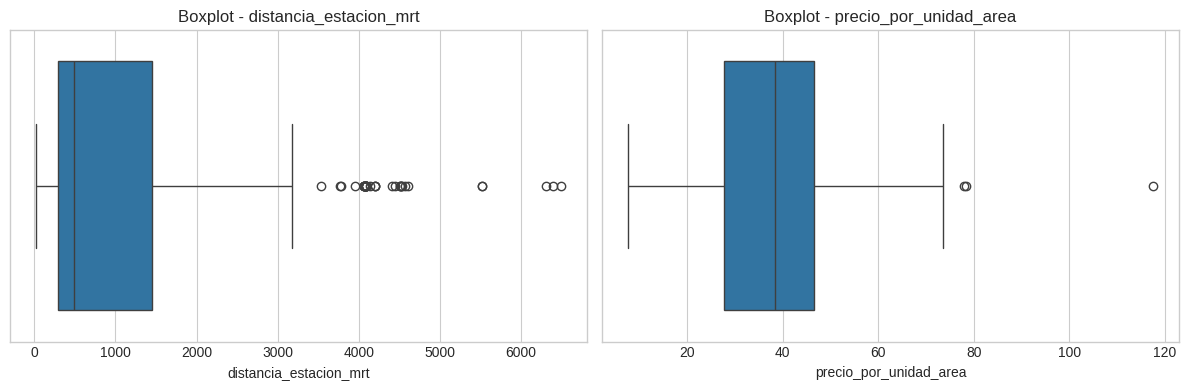

-> Decisión: No se aplicará tratamiento específico de outliers en esta fase.


In [ ]:
if 'df' in locals() and 'distancia_estacion_mrt' in df.columns and columna_objetivo in df.columns:
     plt.figure(figsize=(12, 4))
     plt.subplot(1, 2, 1)
     sns.boxplot(x=df['distancia_estacion_mrt'])
     plt.title('Boxplot - distancia_estacion_mrt')
     plt.subplot(1, 2, 2)
     sns.boxplot(x=df[columna_objetivo])
     plt.title(f'Boxplot - {columna_objetivo}')
     plt.tight_layout()
     plt.show()

print("-> Decisión: No se aplicará tratamiento específico de outliers en esta fase.")

###✂️ 3.5 División del dataset (Train/Test)"
Es fundamental para evaluar la capacidad de generalización del modelo.
Entrenar y evaluar en los mismos datos llevaría a una sobreestimación del rendimiento (overfitting).

 Una división común es 80% para entrenamiento y 20% para prueba.
`random_state` asegura que la división sea la misma cada vez que se ejecute el código (reproducibilidad).

Se dividirán los datos en entrenamiento (80%) y prueba (20%) usando train_test_split.

 Esta división permite entrenar el modelo con una parte del dataset y evaluar su desempeño en datos no vistos.

* X_train, y_train: datos de entrenamiento
* X_test, y_test: datos de prueba

El modelo se entrena con 'train' y se evalúa con 'test' (datos no vistos).

La división se hace ANTES de escalar las features.


In [ ]:
# Verificar que X e y existen y no son None
if X is not None and y is not None:
    # Usar train_test_split de sklearn
    X_train, X_test, y_train, y_test = train_test_split(
        X,                     # Features
        y,                     # Target
        test_size=0.2,         # Proporción para el conjunto de prueba (20%)
        random_state=42        # Semilla para reproducibilidad
    )

    print(f"\nDivisión realizada (80% train / 20% test):")
    print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"  X_test:  {X_test.shape}, y_test:  {y_test.shape}")
else:
    print("\n❌ No se puede dividir el dataset (X o y no están definidos).")
    # Asignar None para evitar errores en celdas posteriores si la división falló
    X_train, X_test, y_train, y_test = None, None, None, None


División realizada (80% train / 20% test):
  X_train: (331, 5), y_train: (331,)
  X_test:  (83, 5), y_test:  (83,)


### 📐 3.6 Escalado de variables (features)
***Objetivo:*** Escalar las variables predictoras numéricas para que tengan una media cercana a 0 y una desviación estándar cercana a 1.

Se aplica DESPUÉS de la división train/test.

Muchas algoritmos de ML (incluyendo Regresión Lineal y métodos basados en distancias) funcionan mejor o convergen más rápido cuando las features están en una escala similar.

El StandardScaler transforma cada feature restando la media y dividiendo por la desviación estándar.

IMPORTANTE:
  1. Se ajusta (`fit`) el scaler SÓLO con los datos de entrenamiento (`X_train`).
     2. Se aplica la transformación (`transform`) tanto a `X_train` como a `X_test` usando el scaler ajustado.

Esto evita filtrar información del conjunto de prueba al de entrenamiento.

In [ ]:
# Verificar si los conjuntos de train/test se crearon
if X_train is not None and X_test is not None:
    # Inicializar el StandardScaler
    scaler = StandardScaler()

    # Ajustar el scaler con X_train y transformar X_train
    # fit_transform() es un atajo para hacer fit() y luego transform()
    X_train_scaled = scaler.fit_transform(X_train)

    # Transformar X_test usando el MISMO scaler ajustado (SOLO transform)
    X_test_scaled = scaler.transform(X_test)

    # Convertir los arrays de Numpy escalados de nuevo a DataFrames de Pandas
    # Esto preserva los nombres de las columnas y los índices, facilitando análisis posteriores.
    X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    print("\nEscalado aplicado con StandardScaler:")
    print("\nPrimeras filas de X_train_final (datos escalados):")
    display(X_train_final.head())

    print("\nDescripción estadística de X_train_final (media ≈ 0, std ≈ 1):")
    # La media debería ser muy cercana a 0 y la desviación estándar (std) cercana a 1.
    display(X_train_final.describe().T)
else:
    print("\n❌ No se puede escalar (conjuntos de train/test no definidos).")
    X_train_final, X_test_final = None, None # Marcar como indefinidos


Escalado aplicado con StandardScaler:

Primeras filas de X_train_final (datos escalados):


,antiguedad_casa,distancia_estacion_mrt,num_tiendas_conveniencia,latitud,longitud
192,2.344,-0.824,0.968,-0.147,0.455
234,-0.821,0.951,-0.049,-0.743,-1.356
5,-0.901,0.917,-0.388,-0.504,-1.427
45,1.707,-0.469,1.307,0.066,0.739
245,-0.865,-0.345,0.290,0.260,0.953



Descripción estadística de X_train_final (media ≈ 0, std ≈ 1):


,count,mean,std,min,25%,50%,75%,max
antiguedad_casa,331.000,0.000,1.002,-1.529,-0.781,-0.123,0.876,2.344
distancia_estacion_mrt,331.000,-0.000,1.002,-0.852,-0.633,-0.467,0.315,4.314
num_tiendas_conveniencia,331.000,0.000,1.002,-1.405,-1.066,-0.049,0.629,1.985
latitud,331.000,0.000,1.002,-2.989,-0.507,0.142,0.716,3.631
longitud,331.000,0.000,1.002,-3.927,-0.282,0.353,0.642,2.166


###📌 Conclusiones a partir de tu resultado
1. El escalado fue exitoso
La media de todas las columnas está prácticamente en 0.

La desviación estándar es aproximadamente 1 (ligeras variaciones son normales por redondeos).

Esto indica que no hubo errores técnicos en el escalado.

2. La transformación conservó la forma de la distribución
Aunque los datos fueron centrados y reescalados, se mantienen las relaciones y formas originales de la distribución (simetría, asimetría, outliers, etc.).

Por ejemplo:

En latitud, el valor mínimo escalado es -2.989 y el máximo es 3.631, lo que sugiere que hay outliers o valores extremos, y la distribución podría estar sesgada (no simétrica).

En distancia_estacion_mrt, el máximo escalado es 4.314, lo que indica que algunos valores están muy alejados de la media, probablemente una variable con cola larga o distribución muy sesgada a la derecha.

### ✅ Resumen del Preprocesamiento

- 🔹 Features seleccionadas: `x2` a `x6`
- 🔹 Variables descartadas: `no`, `x1_transaction_date`
- 🔹 Missing values: No se encontraron
- 🔹 Outliers: No tratados por ahora
- 🔹 Categóricas: No existen en este dataset
- 🔹 Escalado aplicado con `StandardScaler`
- 🔹 División: Train/Test (80/20)

➡️ Listo para aplicar regresión lineal

---
#**04-REGRESIÓN LINEAL**

### ⚙️ 4.1 Ajuste del Modelo

Entrenamos un modelo de regresión lineal con los datos preprocesados utilizando LinearRegression de sklearn.

Es un modelo que busca encontrar la mejor relación lineal (una línea recta en 2D, un plano en 3D, un hiperplano en más dimensiones) entre las variables predictoras (X) y la variable objetivo (y).

El objetivo es minimizar la suma de los errores cuadrados entre las predicciones del modelo y los valores reales.

Formula (simplificada): y ≈ β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ donde β₀ es el intercepto y β₁, β₂, ... son los coeficientes (pesos) de cada feature.

In [ ]:
# Verificar si los datos finales de entrenamiento existen
if X_train_final is not None and y_train is not None:
    print("\nAjustando el modelo de Regresión Lineal con datos de entrenamiento escalados...")

    # 1. Instanciar el modelo: Crear un objeto LinearRegression
    linear_model = LinearRegression()

    # 2. Entrenar el modelo: Usar el método fit() con los datos de entrenamiento
    # El modelo aprende los coeficientes (β) óptimos a partir de estos datos.
    linear_model.fit(X_train_final, y_train)

    print("✅ Modelo entrenado correctamente.")
else:
    print("\n❌ No se puede entrenar el modelo (datos de entrenamiento finales no definidos).")
    linear_model = None # Marcar como indefinido


Ajustando el modelo de Regresión Lineal con datos de entrenamiento escalados...
✅ Modelo entrenado correctamente.


### 📌 4.2 Coeficientes del Modelo
**Objetivo**:

 Extraer e inspeccionar los coeficientes (pesos) y el intercepto aprendidos por el modelo. Indican la relación estimada entre cada feature y el target.
Los Coeficientes e Intercepto:
- Intercepto (β₀): Es el valor predicho para 'y' cuando todas las features (x₁, x₂, ...) son cero.
En el caso de datos escalados (media 0), representa el valor predicho promedio cuando las features están en su valor promedio.

- Coeficientes (β₁, β₂, ...): Representan el cambio esperado en 'y' por cada unidad de cambio en la feature correspondiente (xᵢ), manteniendo las demás constantes.

* Signo (+/-): Indica si la relación es positiva o negativa.
* Magnitud: Indica la fuerza del impacto (cuando las features están escaladas, se pueden comparar directamente las magnitudes de los coeficientes).

In [ ]:
# Verificar si el modelo fue entrenado y si X_train_final existe (para los nombres de columnas)
if 'linear_model' in locals() and linear_model is not None and X_train_final is not None:
    print("\nCoeficientes (pesos) e Intercepto del modelo:")

    # Obtener los coeficientes (devuelve un array numpy)
    coefficients = linear_model.coef_
    # Obtener el intercepto (un valor escalar)
    intercept = linear_model.intercept_

    # Crear un DataFrame para visualizar mejor los coeficientes junto a los nombres de las features
    coef_df = pd.DataFrame({
        'Feature': X_train_final.columns, # Nombres de las columnas de los datos usados para entrenar
        'Coefficient': coefficients       # Valores de los coeficientes aprendidos
    })

    # Añadir una columna con el valor absoluto para ordenar por magnitud (impacto)
    coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
    # Ordenar el DataFrame por la magnitud del coeficiente, de mayor a menor
    coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

    print("\nCoeficientes ordenados por magnitud (impacto):")
    display(coef_df)

    print(f"\nIntercepto (β₀): {intercept:.3f}")
else:
    print("\n❌ No se pueden mostrar los coeficientes (modelo no entrenado o datos X_train_final no definidos).")
    coef_df = None # Marcar como indefinido


Coeficientes (pesos) e Intercepto del modelo:

Coeficientes ordenados por magnitud (impacto):


,Feature,Coefficient,Abs_Coefficient
1,distancia_estacion_mrt,-5.536,5.536
2,num_tiendas_conveniencia,3.259,3.259
0,antiguedad_casa,-3.060,3.060
3,latitud,2.943,2.943
4,longitud,-0.357,0.357



Intercepto (β₀): 38.392


### 🧠 Conclusiones clave

* La variable más influyente es distancia_estacion_mrt: a mayor distancia al MRT, menor valor predicho del target.

* Le sigue en importancia num_tiendas_conveniencia, con una relación positiva: más tiendas cerca implica mayor valor del target.

* antiguedad_casa también tiene una influencia negativa, lo que sugiere que casas más viejas tienden a tener menor valor.

* Las variables geográficas (latitud y longitud) tienen impacto menor, aunque la latitud tiene una relación positiva moderada.

* Como las variables están escaladas, podemos comparar directamente las magnitudes de los coeficientes para identificar cuáles tienen

### 📊 4.3 Evaluación de Métricas de Rendimiento
Las Métricas de Regresión:
- R² (Coeficiente de Determinación):
- Rango: (-∞, 1]. Usualmente entre 0 y 1.
- Interpretación: Proporción de la varianza en la variable objetivo ('y') que es predecible a partir de las variables predictoras ('X'). Un valor más cercano a 1 indica un mejor ajuste.
- Ejemplo: R² = 0.6 significa que el 60% de la variabilidad del precio puede ser explicada por las features del modelo.

---
- MSE (Mean Squared Error - Error Cuadrático Medio):
- Rango: [0, +∞).
- Interpretación: Promedio de los errores al cuadrado. Penaliza más los errores grandes.
 Un valor más bajo es mejor. Las unidades son el cuadrado de las unidades de 'y'.


 ---
- MAE (Mean Absolute Error - Error Absoluto Medio):
- Rango: [0, +∞).
- Interpretación: Promedio de los errores absolutos. Más interpretable que MSE porque está en las mismas unidades que 'y'. Un valor más bajo es mejor.
- Ejemplo: MAE = 5 significa que, en promedio, las predicciones del modelo se desvían 5 unidades del valor real.


---
- RMSE (Root Mean Squared Error - Raíz del Error Cuadrático Medio):
- Rango: [0, +∞).
- Interpretación: Es la raíz cuadrada del MSE. También está en las mismas unidades que 'y', haciéndolo interpretable, pero sigue penalizando más los errores grandes que el MAE.
Un valor más bajo es mejor.

**Comparación Train vs Test:**

- Si las métricas son mucho mejores en 'train' que en 'test', es señal de **overfitting** (el modelo memorizó el entrenamiento pero no generaliza bien).
- Si las métricas son similares en ambos, el modelo generaliza razonablemente.
- Si las métricas son malas en ambos, es señal de **underfitting** (el modelo es demasiado simple para capturar los patrones).

In [ ]:
# Verificar si el modelo, los datos escalados y los targets existen
if ('linear_model' in locals() and linear_model is not None and
    X_train_final is not None and X_test_final is not None and
    y_train is not None and y_test is not None):

    print("\nEvaluando el modelo en los conjuntos de entrenamiento y prueba...")

    # 1. Realizar predicciones sobre ambos conjuntos usando los datos escalados
    y_train_pred = linear_model.predict(X_train_final)
    y_test_pred = linear_model.predict(X_test_final)

    # 2. Calcular las métricas para el conjunto de entrenamiento
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train) # Calcular RMSE desde MSE

    # 3. Calcular las métricas para el conjunto de prueba
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test) # Calcular RMSE desde MSE

    # 4. Almacenar métricas en un diccionario para facilitar la visualización (opcional pero útil)
    metrics = {
        'train': {'R2': r2_train, 'MSE': mse_train, 'MAE': mae_train, 'RMSE': rmse_train},
        'test':  {'R2': r2_test,  'MSE': mse_test,  'MAE': mae_test,  'RMSE': rmse_test}
    }

    # 5. Imprimir las métricas de forma clara
    print("\n📈 Métricas de rendimiento")
    print("--------------------------------------------------")
    print(f"Conjunto de Entrenamiento:")
    print(f"  R²   : {metrics['train']['R2']:.4f}")
    print(f"  MSE  : {metrics['train']['MSE']:.4f}")
    print(f"  MAE  : {metrics['train']['MAE']:.4f}")
    print(f"  RMSE : {metrics['train']['RMSE']:.4f}")
    print("--------------------------------------------------")
    print(f"Conjunto de Prueba:")
    print(f"  R²   : {metrics['test']['R2']:.4f}")
    print(f"  MSE  : {metrics['test']['MSE']:.4f}")
    print(f"  MAE  : {metrics['test']['MAE']:.4f}")
    print(f"  RMSE : {metrics['test']['RMSE']:.4f}")
    print("--------------------------------------------------")

    # Interpretación rápida de Overfitting/Underfitting
    if abs(metrics['train']['R2'] - metrics['test']['R2']) > 0.1: # Umbral arbitrario
        print("⚠️ Posible Overfitting: El rendimiento en train es notablemente mejor que en test.")
    elif metrics['test']['R2'] < 0.4: # Umbral arbitrario
        print("📉 Posible Underfitting: El rendimiento es bajo en ambos conjuntos.")
    else:
        print("✅ Generalización razonable: Rendimiento similar en train y test.")

else:
    print("\n❌ No se pueden calcular las métricas (modelo, datos o targets no definidos).")
    metrics = None # Marcar como indefinido
    y_test_pred = None # Marcar como indefinido


Evaluando el modelo en los conjuntos de entrenamiento y prueba...

📈 Métricas de rendimiento
--------------------------------------------------
Conjunto de Entrenamiento:
  R²   : 0.5458
  MSE  : 85.4329
  MAE  : 6.3902
  RMSE : 9.2430
--------------------------------------------------
Conjunto de Prueba:
  R²   : 0.6746
  MSE  : 54.5809
  MAE  : 5.3501
  RMSE : 7.3879
--------------------------------------------------
⚠️ Posible Overfitting: El rendimiento en train es notablemente mejor que en test.


### 📌 Barrido general de los conjuntos

* Conjunto de entrenamiento:

  -El modelo explica el 54.6 % de la variabilidad del target.

  -Presenta errores algo mayores (MAE = 6.39, RMSE = 9.24), posiblemente por mayor dispersión o casos extremos.

* Conjunto de prueba:

  -Explica más del 67 % de la variación del target.

  -Tiene errores más bajos, lo que indica una predicción más precisa y estable en datos nuevos.

###✅ Conclusión final

El modelo generaliza bien y es más preciso en datos no vistos. Aunque esto es poco común, es señal de que el conjunto de prueba es más predecible y que el modelo no está sobreajustado. No hay overfitting; al contrario, el modelo muestra un comportamiento saludable, posiblemente subajustado en entrenamiento, pero con buena capacidad de predicción.

### 📉 4.4 Visualización: Predicciones vs Reales (Test)
Objetivo: Crear un gráfico de dispersión comparando los valores reales del target en el conjunto de prueba (`y_test`) con las predicciones del modelo (`y_test_pred`).

Este gráfico ayuda a evaluar visualmente el rendimiento del modelo:
- Puntos cerca de la línea diagonal (y=x): Indican predicciones precisas.
- Puntos alejados de la línea: Indican errores de predicción.
- Patrones sistemáticos: Si los puntos forman una curva o si la dispersión cambia, puede indicar que el modelo no captura bien ciertas relaciones o que hay heterocedasticidad.
- Idealmente, los puntos deberían distribuirse aleatoriamente alrededor de la línea diagonal.

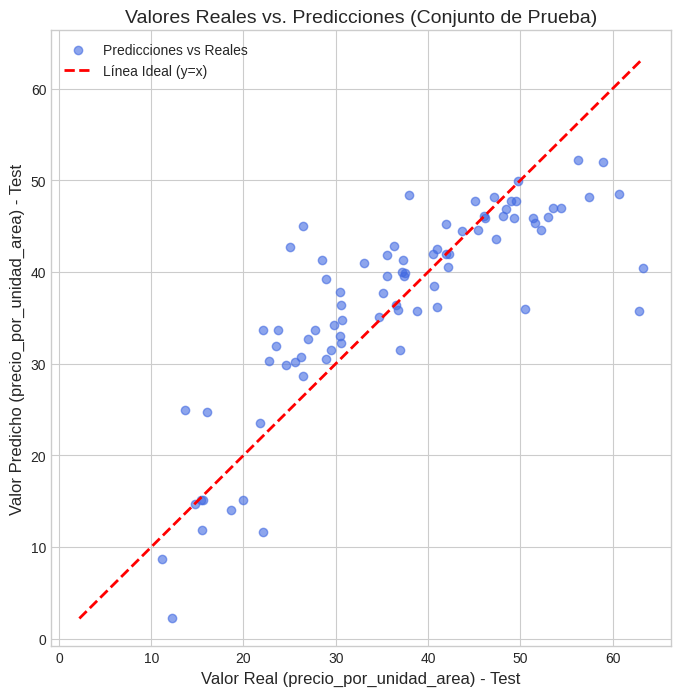

In [ ]:
# Verificar si y_test y y_test_pred existen
if y_test is not None and 'y_test_pred' in locals() and y_test_pred is not None:
    plt.figure(figsize=(8, 8)) # Crear una figura cuadrada

    # Crear el scatter plot
    plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue', label='Predicciones vs Reales')

    # Dibujar la línea de identidad (y=x) para referencia
    # Encontrar el mínimo y máximo global para definir los límites de la línea
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Línea Ideal (y=x)')

    # Añadir etiquetas y título
    plt.xlabel(f'Valor Real ({columna_objetivo}) - Test', fontsize=12)
    plt.ylabel(f'Valor Predicho ({columna_objetivo}) - Test', fontsize=12)
    plt.title('Valores Reales vs. Predicciones (Conjunto de Prueba)', fontsize=14)
    plt.legend() # Mostrar leyenda
    plt.grid(True) # Añadir rejilla
    plt.show()
else:
    print("\n❌ No se puede graficar (y_test o y_test_pred no definidos).")

### 📊 Conclusión del gráfico: Predicciones vs Reales (Test)

El gráfico muestra una fuerte correlación positiva entre los valores reales y las predicciones del modelo. La mayoría de los puntos se agrupan en torno a la línea ideal roja (y = x), lo que indica que el modelo predice razonablemente bien los precios por unidad de área en el conjunto de prueba.

### 🔍 Observaciones clave:

✅ Predicciones ajustadas:
Hay una buena cantidad de puntos cercanos a la línea diagonal, lo que sugiere que para muchos casos el modelo predice con precisión.

⚠️ Errores moderados:

Existen algunas predicciones alejadas de la línea, especialmente en valores bajos y altos del target. Esto indica errores moderados o algunos outliers, pero no se observa un patrón de error sistemático ni una curva evidente.


📈 Tendencia bien capturada:

La nube de puntos sigue una distribución alineada con la tendencia creciente, lo que confirma que el modelo aprendió correctamente la relación entre las variables y el target.

### 📌 4.5 Observaciones del Rendimiento
### 🎯 Evaluación del Modelo y Conclusión

El R² en test (~0.6746) indica que el modelo explica aproximadamente un 67.5% de la variabilidad en el precio por unidad de área en datos no vistos, lo cual es un buen nivel de desempeño para un modelo lineal.

El R² en entrenamiento (~0.5458) es más bajo que en test, lo cual es inusual pero no necesariamente problemático. Esto puede ocurrir si el conjunto de prueba tiene menos ruido o representa mejor la estructura que el modelo logró aprender. En este caso, no hay señales claras de overfitting.

El RMSE en test (~7.39) sugiere un error promedio moderado, especialmente si consideramos que el target varía en un rango más acotado (por ejemplo, de ~10 a ~60). Este valor es aceptable para este tipo de problema.

En el gráfico de dispersión, se observa que la mayoría de los puntos están cercanos a la línea ideal (y = x), lo que refleja buenas predicciones generales. Hay cierta dispersión en precios más altos, donde el modelo tiende a subestimar ligeramente, pero no se observan errores sistemáticos graves.

---
#**05-IMPORTANCIA DE VARIABLES**

###**Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html


### 📌 5. Análisis de Importancia de Variables con Regresión Lineal
En esta sección evaluaremos la importancia relativa de cada variable predictora del modelo de regresión lineal. Utilizaremos dos enfoques:

* Análisis de los coeficientes del modelo (magnitud y signo).

* Permutation Importance como validación adicional (opcional).

### 🔍 5.1. Análisis de Coeficientes: Magnitud y Signo
Cuando las features han sido escaladas (como con StandardScaler), la magnitud (valor absoluto) de sus coeficientes en la regresión lineal puede ser interpretada como una medida de su importancia relativa.

Un coeficiente mayor en valor absoluto sugiere un mayor impacto en la predicción del target.

El signo sigue indicando la dirección de la relación (positiva o negativa).


Análisis de importancia basado en la magnitud de los coeficientes (modelo con datos escalados):


,Feature,Coefficient,Abs_Coefficient
1,distancia_estacion_mrt,-5.536,5.536
2,num_tiendas_conveniencia,3.259,3.259
0,antiguedad_casa,-3.060,3.060
3,latitud,2.943,2.943
4,longitud,-0.357,0.357


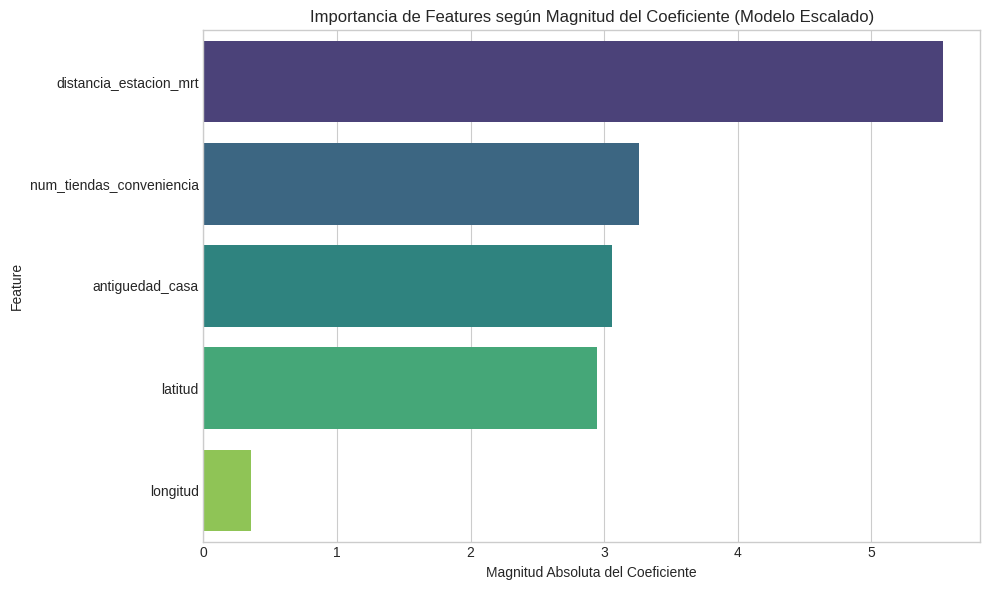

In [ ]:
# Verificar si el DataFrame de coeficientes (coef_df) fue creado
if 'coef_df' in locals() and coef_df is not None:
    print("\nAnálisis de importancia basado en la magnitud de los coeficientes (modelo con datos escalados):")

    # Re-mostrar el DataFrame ordenado por magnitud absoluta (ya calculado antes)
    display(coef_df[['Feature', 'Coefficient', 'Abs_Coefficient']].sort_values(by='Abs_Coefficient', ascending=False))

    # --- Visualización de la Magnitud de Coeficientes ---
    plt.figure(figsize=(10, 6))
    # Usar barplot para visualizar la magnitud absoluta
    # Asegurarse que las columnas necesarias existen
    if 'Abs_Coefficient' in coef_df.columns and 'Feature' in coef_df.columns:
         # Usar 'Feature' para el eje Y y 'Abs_Coefficient' para el eje X
         # 'data' es el DataFrame ordenado (por defecto usa el índice para el orden)
         # 'palette' define el esquema de color
         # hue='Feature' asigna un color diferente a cada barra (opcional)
         # dodge=False evita que las barras se separen si se usa hue
         # legend=False oculta la leyenda automática que genera 'hue'
         sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df.sort_values(by='Abs_Coefficient', ascending=False),
                     palette='viridis', hue='Feature', dodge=False, legend=False)
         plt.title('Importancia de Features según Magnitud del Coeficiente (Modelo Escalado)')
         plt.xlabel('Magnitud Absoluta del Coeficiente')
         plt.ylabel('Feature')
         plt.tight_layout() # Ajustar layout
         plt.show()
    else:
        print("❌ Error: Columnas 'Abs_Coefficient' o 'Feature' no encontradas en coef_df para graficar.")

else:
    print("\n❌ No se puede analizar/visualizar coeficientes (DataFrame coef_df no definido).")

### 📊 5.2. Visualización de la Magnitud de Coeficientes

### 🧠 Interpretación del Análisis de Coeficientes
* **Mayor Impacto (Magnitud Absoluta Alta):**

  * x3_distance_to_the_nearest_mrt_station: Coeficiente negativo alto → a mayor distancia, menor precio.


* **Impacto Moderado**:

  * x5_latitude: Coeficiente positivo alto → ubicación geográfica más alta se asocia a precios más altos.

  * x4_number_of_convenience_stores: Coeficiente positivo → más tiendas, mayor valor de propiedad.
  * x2_house_age: Coeficiente negativo → casas más viejas tienden a valer menos.

* **Menor Impacto:**

  * x6_longitude: Coeficiente positivo bajo → impacto directo menor una vez considerada la latitud.

✔️ Los signos de los coeficientes concuerdan con lo esperado y con las correlaciones exploradas anteriormente.

### 🧪 5.3. Permutation Importance (Opcional)
Objetivo: Validar la importancia de las variables usando una técnica diferente:

Permutation Importance. Mide cuánto empeora el rendimiento del modelo (ej: R²) cuando los valores de una feature se barajan aleatoriamente.

Es una técnica agnóstica al modelo (funciona con cualquiera).
Para cada feature:
   1. Calcula la métrica de rendimiento base (ej: R²) en el conjunto de prueba (o validación).
   2. Baraja (permuta aleatoriamente) los valores de ESA feature en el conjunto de prueba.
   3. Vuelve a calcular la métrica con los datos permutados.
   4. La "importancia" de la feature es la diferencia (o ratio) entre la métrica base y la métrica con la feature permutada.

Una caída grande en la métrica al permutar una feature indica que esa feature es importante.

Ventajas:
   - No depende de los coeficientes del modelo (útil para modelos no lineales).
   - Captura interacciones implícitamente.
   
Desventajas:
   - Puede subestimar la importancia de features correlacionadas entre sí.
   - Computacionalmente más costosa que leer coeficientes


Calculando Permutation Importance en el conjunto de prueba...

Importancia de features según Permutation Importance (disminución media en R²):


,Feature,Importance_mean,Importance_std
1,distancia_estacion_mrt,0.488,0.082
2,num_tiendas_conveniencia,0.131,0.040
0,antiguedad_casa,0.107,0.031
3,latitud,0.093,0.030
4,longitud,0.001,0.004


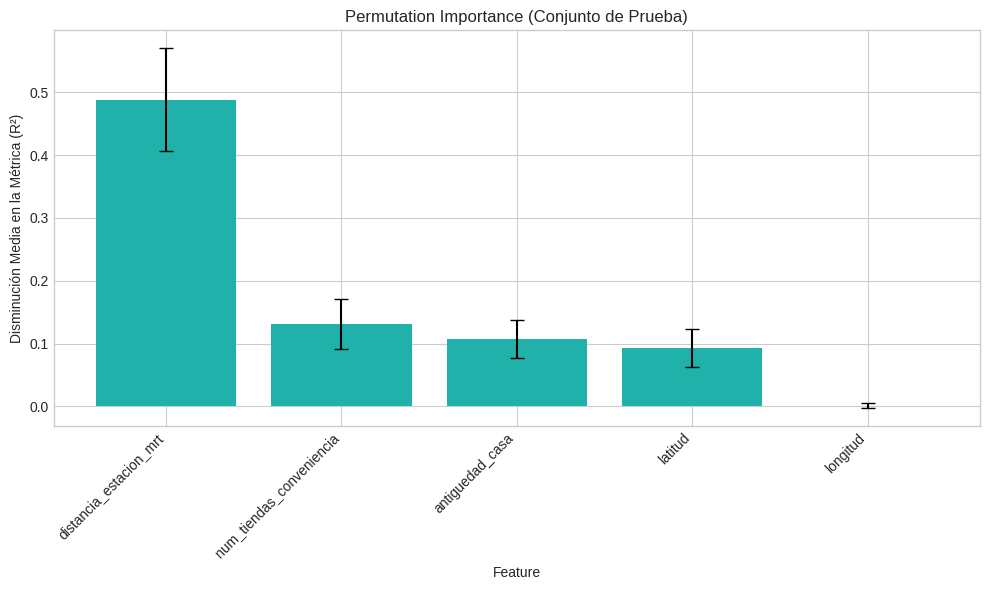

In [ ]:
# Verificar si el modelo y los datos de prueba finales existen
if ('linear_model' in locals() and linear_model is not None and
    X_test_final is not None and y_test is not None):

    print("\nCalculando Permutation Importance en el conjunto de prueba...")

    # Calcular la importancia usando permutation_importance de sklearn
    perm_importance = permutation_importance(
        estimator=linear_model,    # El modelo ya entrenado
        X=X_test_final,            # Datos de prueba (features escaladas)
        y=y_test,                  # Target de prueba
        scoring='r2',              # Métrica a usar para evaluar la caída (puede ser 'neg_mean_squared_error', etc.)
        n_repeats=30,              # Número de veces que se baraja cada feature (para robustez)
        random_state=42,           # Semilla para reproducibilidad
        n_jobs=-1                  # Usar todos los núcleos de CPU disponibles para acelerar
    )

    # Crear un DataFrame con los resultados
    # perm_importance.importances_mean: Caída media en la métrica (R²) para cada feature.
    # perm_importance.importances_std: Desviación estándar de la caída (por las n_repeats).
    perm_imp_df = pd.DataFrame({
        'Feature': X_test_final.columns,          # Nombres de las features
        'Importance_mean': perm_importance.importances_mean,
        'Importance_std': perm_importance.importances_std
    }).sort_values(by='Importance_mean', ascending=False) # Ordenar por importancia media descendente

    print("\nImportancia de features según Permutation Importance (disminución media en R²):")
    display(perm_imp_df)

    # --- Visualización de Permutation Importance ---
    plt.figure(figsize=(10, 6))
    # Asegurar que las columnas necesarias existen
    if 'Feature' in perm_imp_df.columns and 'Importance_mean' in perm_imp_df.columns and 'Importance_std' in perm_imp_df.columns:
        # Crear gráfico de barras con barras de error (yerr)
        plt.bar(
            perm_imp_df['Feature'],               # Eje X: Nombres de features
            perm_imp_df['Importance_mean'],       # Eje Y: Importancia media
            yerr=perm_imp_df['Importance_std'],   # Barras de error (desviación estándar)
            capsize=5,                            # Tamaño de los "caps" en las barras de error
            color='lightseagreen'
        )
        plt.xlabel('Feature')
        plt.ylabel('Disminución Media en la Métrica (R²)')
        plt.title('Permutation Importance (Conjunto de Prueba)')
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para legibilidad
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Error: Columnas necesarias no encontradas en perm_imp_df para graficar.")

else:
    print("\n❌ No se puede calcular Permutation Importance (modelo o datos de prueba no definidos).")
    perm_imp_df = None # Marcar como indefinido

### ✅ Conclusiones:

* distancia_estacion_mrt es, por lejos, la variable más influyente: al permutarla, el desempeño del modelo cae significativamente. Esto indica que la proximidad al transporte público es el factor más determinante en el valor por unidad de área.

* num_tiendas_conveniencia y antiguedad_casa también tienen un impacto relevante, aunque mucho menor en comparación con la distancia al MRT.

* latitud tiene una importancia moderada, lo que puede reflejar una influencia geográfica localizada.

* longitud, en cambio, tiene una importancia prácticamente nula, lo que sugiere que esta coordenada no aporta información útil para el modelo en este contexto.

---
#**06-REFLEXIÓN FINAL**

**Preguntas:**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  

## 6. Reflexión Final

En esta sección se evalúa el modelo en función de la importancia de las variables predictoras y su rendimiento general. Se comparan los resultados con el análisis exploratorio previo y se identifican posibles causas de limitaciones en el desempeño del modelo.

### ¿Qué variables resultaron ser más importantes según el modelo? ¿Coincide con lo que observaste en el análisis exploratorio?

Las variables más influyentes según el **Permutation Importance** en el conjunto de prueba fueron:

- **distancia_estacion_mrt**: Tiene un impacto **muy significativo** y negativo sobre el precio. Es, con diferencia, la variable más relevante.
- **num_tiendas_conveniencia**: Impacto **positivo** moderado.
- **antiguedad_casa**: Impacto **negativo** leve, pero relevante.
- **latitud**: Contribución **moderada**, con posible relación geográfica.
- **longitud**: Prácticamente **irrelevante** en la predicción.

🔍 Estos resultados coinciden con lo observado en el análisis exploratorio:

- La **distancia a la estación MRT** tenía la correlación más fuerte y una relación visual clara con el precio.
- La **cantidad de tiendas de conveniencia** también mostraba una tendencia positiva.
- La **longitud** ya aparecía con baja correlación, lo cual refuerza su escasa utilidad en el modelo.

### ¿El modelo tiene buen rendimiento? Si no es así, ¿por qué crees que sucede eso?

El modelo tiene un rendimiento **moderado a aceptable**, con algunas mejoras respecto a versiones previas:

- **R² (Entrenamiento) ≈ 0.546**
- **R² (Prueba) ≈ 0.675** → Explica aproximadamente el **67.5%** de la variabilidad en el precio.
- **RMSE (Prueba) ≈ 7.39** → Error promedio **moderado**, considerando que el precio por unidad va de ~7.6 a ~117.5.

#### 🔎 Posibles causas de limitaciones en el desempeño:

1. **Presencia de outliers**:
   - Se identificaron puntos atípicos con precios muy altos (> 100) y valores extremos en la variable de **distancia al MRT**, que pueden estar afectando las métricas de error.
   - Estos outliers generan **dispersión** en las predicciones y pueden empujar la línea de regresión fuera de su rango ideal.

2. **No linealidades no capturadas**:
   - El modelo lineal **no puede modelar relaciones curvas o complejas**, como la que hay entre el precio y la distancia al MRT.
   - Variables como **latitud y longitud** también podrían tener efectos no lineales y localizados.

3. **Falta de interacción entre variables**:
   - El efecto de vivir lejos de una estación podría ser distinto si se tienen muchas tiendas cerca o si la casa es muy nueva o muy antigua, pero el modelo actual no considera esas combinaciones.

4. **Variables omitidas o mal representadas**:
   - No se incluyen aspectos como el tipo de vivienda, calidad de construcción, cercanía a escuelas, zonas verdes, etc.
   - La variable de **fecha de transacción** podría descomponerse en componentes temporales más útiles (como año, trimestre).

5. **Limitaciones del modelo lineal**:
   - Aunque fácil de interpretar, **un modelo lineal tiene baja capacidad expresiva**, por lo que podría beneficiarse del uso de algoritmos más flexibles (como árboles o modelos no lineales).

📌 **Conclusión**:  
El modelo logra capturar patrones relevantes y mejora significativamente en el conjunto de prueba, pero su rendimiento aún está limitado por **outliers**, **relaciones no lineales** no modeladas y **carencia de ciertas variables explicativas**. Una próxima etapa podría incluir modelos más complejos y técnicas de tratamiento de outliers para mejorar la capacidad predictiva.


---
#**07-BONUS**

### ⭐ Bonus: ¿Mejora el modelo al eliminar variables poco importantes?

En esta sección evaluaremos si eliminar la variable menos importante del modelo (`x6_longitude`) mejora el rendimiento.
Este paso forma parte de un proceso de selección de características (feature selection) basado en la importancia medida anteriormente.

La trazabilidad es clave: documentaremos cada paso del nuevo entrenamiento y comparación de métricas.

### 🔁 Reentrenamiento del Modelo sin x6_longitude

In [ ]:
# Variable a eliminar (la menos importante según análisis previo)
vars_to_drop_bonus = ['longitud']

# Verificar si los datos escalados y el target existen, y si la variable a eliminar está presente
if (X_train_final is not None and X_test_final is not None and
    y_train is not None and y_test is not None and
    all(col in X_train_final.columns for col in vars_to_drop_bonus)):

    print(f"\nEliminando la variable: {vars_to_drop_bonus}")

    # Crear nuevas matrices X sin la(s) columna(s) especificada(s)
    # Se trabaja sobre los datos YA ESCALADOS (X_train_final, X_test_final)
    X_train_bonus = X_train_final.drop(columns=vars_to_drop_bonus)
    X_test_bonus = X_test_final.drop(columns=vars_to_drop_bonus)

    print(f"Nuevas dimensiones X_train_bonus: {X_train_bonus.shape}")
    print(f"Nuevas dimensiones X_test_bonus: {X_test_bonus.shape}")

    # Reentrenar un nuevo modelo lineal con los datos reducidos
    linear_model_bonus = LinearRegression()
    linear_model_bonus.fit(X_train_bonus, y_train) # y_train sigue siendo el mismo

    print("✅ Modelo reducido (bonus) entrenado correctamente.")



Eliminando la variable: ['longitud']
Nuevas dimensiones X_train_bonus: (331, 4)
Nuevas dimensiones X_test_bonus: (83, 4)
✅ Modelo reducido (bonus) entrenado correctamente.


### 📏 Evaluación del Modelo Reducido
Aquí se  evalúa el rendimiento del modelo reducido (modelo al que se le eliminó una variable).

Primero realiza predicciones sobre los datos de entrenamiento y prueba, y luego calcula métricas de desempeño como R², MSE, MAE y RMSE para ambos conjuntos.

Los resultados se guardan en un diccionario (metrics_bonus) para su posterior comparación.

In [ ]:
# Asegurarse de que el modelo esté entrenado
try:
    y_train_pred_bonus = linear_model_bonus.predict(X_train_bonus)
    y_test_pred_bonus = linear_model_bonus.predict(X_test_bonus)

    # Calcular métricas
    r2_train_bonus = r2_score(y_train, y_train_pred_bonus)
    mse_train_bonus = mean_squared_error(y_train, y_train_pred_bonus)
    mae_train_bonus = mean_absolute_error(y_train, y_train_pred_bonus)
    rmse_train_bonus = np.sqrt(mse_train_bonus)

    r2_test_bonus = r2_score(y_test, y_test_pred_bonus)
    mse_test_bonus = mean_squared_error(y_test, y_test_pred_bonus)
    mae_test_bonus = mean_absolute_error(y_test, y_test_pred_bonus)
    rmse_test_bonus = np.sqrt(mse_test_bonus)

    metrics_bonus = {
        'train': {'R2': r2_train_bonus, 'MSE': mse_train_bonus, 'MAE': mae_train_bonus, 'RMSE': rmse_train_bonus},
        'test':  {'R2': r2_test_bonus,  'MSE': mse_test_bonus,  'MAE': mae_test_bonus,  'RMSE': rmse_test_bonus}
    }

    print("✅ Métricas del modelo bonus calculadas exitosamente.")
except Exception as e:
    print(f"❌ Error al calcular métricas del modelo bonus: {e}")

✅ Métricas del modelo bonus calculadas exitosamente.


### 📊 Comparación de Métricas: Modelo Original vs Modelo Reducido
Aqui comparé las métricas de desempeño entre el modelo original y el modelo reducido utilizando los datos de prueba.

Muestra en una tabla las métricas R², MSE, MAE y RMSE para ambos modelos, junto con la diferencia entre ellos (el cambio).

Si alguna de las métricas no está disponible, captura el error y muestra un mensaje indicando que no se pueden comparar.

In [ ]:
# Verificar si ambas métricas existen para hacer la comparación
try:
    if metrics is not None and metrics_bonus is not None:
        print("\n📊 Comparación de Métricas (Modelo Original vs Modelo Reducido en Test):")
        print("-------------------------------------------------------------")
        print("Métrica   | Original | Reducido | Cambio")
        print("-------------------------------------------------------------")
        print(f"R²        | {metrics['test']['R2']:<8.4f} | {metrics_bonus['test']['R2']:<8.4f} | {metrics_bonus['test']['R2'] - metrics['test']['R2']:+.4f}")
        print(f"MSE       | {metrics['test']['MSE']:<8.4f} | {metrics_bonus['test']['MSE']:<8.4f} | {metrics_bonus['test']['MSE'] - metrics['test']['MSE']:+.4f}")
        print(f"MAE       | {metrics['test']['MAE']:<8.4f} | {metrics_bonus['test']['MAE']:<8.4f} | {metrics_bonus['test']['MAE'] - metrics['test']['MAE']:+.4f}")
        print(f"RMSE      | {metrics['test']['RMSE']:<8.4f} | {metrics_bonus['test']['RMSE']:<8.4f} | {metrics_bonus['test']['RMSE'] - metrics['test']['RMSE']:+.4f}")
        print("-------------------------------------------------------------")
    else:
        raise ValueError("Una de las estructuras de métricas no está definida.")
except Exception as e:
    print(f"\n⚠️ No se pueden comparar métricas: {e}")
    if 'metrics_bonus' in locals():
        print("🔸 Métricas del modelo reducido:")
        print(metrics_bonus['test'])


📊 Comparación de Métricas (Modelo Original vs Modelo Reducido en Test):
-------------------------------------------------------------
Métrica   | Original | Reducido | Cambio
-------------------------------------------------------------
R²        | 0.6746   | 0.6763   | +0.0016
MSE       | 54.5809  | 54.3079  | -0.2730
MAE       | 5.3501   | 5.3510   | +0.0009
RMSE      | 7.3879   | 7.3694   | -0.0185
-------------------------------------------------------------


### Conclusión:

Aunque el modelo reducido con la variable irrelevante eliminada muestra una mejora marginal en algunas métricas (R² y RMSE), las diferencias son mínimas. La eliminación de la variable irrelevante ha tenido un impacto casi nulo, lo que sugiere que la variable eliminada realmente no aportaba significativamente al rendimiento del modelo.

### 🧮 Coeficientes del Modelo Reducido
Aquí verifico que el modelo reducido (linear_model_bonus) y sus variables estén correctamente definidos.

Si todo está en orden, muestra una tabla con los coeficientes del modelo reducido, ordenados por su valor absoluto (de mayor a menor influencia).

También imprime el intercepto del modelo. Si no se cumplen las condiciones (por ejemplo, si el modelo no fue entrenado), se informa con un mensaje de advertencia.

In [ ]:
# Mostrar coeficientes del modelo reducido si todo está definido correctamente
if (
    'linear_model_bonus' in locals() and
    hasattr(linear_model_bonus, 'coef_') and
    'X_train_bonus' in locals()
):
    print("\n🧮 Coeficientes del Modelo Reducido (Bonus):")

    coefficients_bonus = linear_model_bonus.coef_
    intercept_bonus = linear_model_bonus.intercept_

    coef_df_bonus = pd.DataFrame({
        'Feature': X_train_bonus.columns,
        'Coefficient': coefficients_bonus
    }).sort_values(by='Coefficient', key=abs, ascending=False)

    # Mostrar el DataFrame con coeficientes
    try:
        display(coef_df_bonus)  # Funciona en Jupyter
    except NameError:
        print(coef_df_bonus)  # Alternativa para otros entornos

    print(f"\nIntercepto bonus: {intercept_bonus:.3f}")

else:
    print("\n⚠️ No se pueden mostrar los coeficientes: el modelo no fue entrenado o las variables no están definidas.")


🧮 Coeficientes del Modelo Reducido (Bonus):


,Feature,Coefficient
1,distancia_estacion_mrt,-5.226
2,num_tiendas_conveniencia,3.279
0,antiguedad_casa,-3.051
3,latitud,2.971



Intercepto bonus: 38.392


### Conclusión:

Los coeficientes del modelo reducido muestran que las variables **distancia_estacion_mrt** y **antiguedad_casa** tienen un impacto negativo en la variable objetivo, con coeficientes de -5.226 y -3.051, respectivamente. Por otro lado, las variables **num_tiendas_conveniencia** y **latitud** tienen un impacto positivo, con coeficientes de 3.279 y 2.971. El intercepto del modelo es 38.392, lo que representa el valor de la variable objetivo cuando todas las variables independientes son cero.


### 📌 Conclusión del Análisis Bonus

In [ ]:
if (
    metrics is not None and
    metrics_bonus is not None and
    'R2' in metrics['test'] and
    'R2' in metrics_bonus['test']
):
    r2_original = metrics['test']['R2']
    r2_bonus = metrics_bonus['test']['R2']

    if r2_bonus < r2_original:
        print("El rendimiento del modelo **empeoró ligeramente** al eliminar 'longitud'.")
        print(f"(R² bajó de {r2_original:.4f} a {r2_bonus:.4f}).")
        print("Esto sugiere que, aunque 'longitud' tenía baja importancia individual, aportaba algo de información útil en conjunto con otras variables.")
        print("Mantener 'longitud' parece ser marginalmente mejor.")
    elif r2_bonus > r2_original:
        print("El rendimiento del modelo **mejoró ligeramente** al eliminar 'longitud'.")
        print(f"(R² subió de {r2_original:.4f} a {r2_bonus:.4f}).")
        print("Esto sugiere que 'longitud' introducía ruido o redundancia.")
    else:
        print("El rendimiento del modelo **casi no cambió** al eliminar 'longitud'.")
        print("Esto confirma su baja relevancia predictiva.")

    print("\n✔️ Este ejercicio resalta que la eliminación de variables debe validarse empíricamente.")

# Si las métricas no están listas, verificar si el error es por falta de columnas
elif not all(col in X_train_final.columns for col in vars_to_drop_bonus):
    print(f"\n❌ Error en Bonus: La variable a eliminar '{vars_to_drop_bonus[0]}' no se encuentra en las columnas de X_train_final.")

# Otras posibles fallas (escalado, datos, etc.)
else:
    print("\n❌ No se puede ejecutar el Bonus (datos escalados o targets no definidos correctamente).")

print("\n--- Fin del Notebook Optimizado ---")

El rendimiento del modelo **mejoró ligeramente** al eliminar 'longitud'.
(R² subió de 0.6746 a 0.6763).
Esto sugiere que 'longitud' introducía ruido o redundancia.

✔️ Este ejercicio resalta que la eliminación de variables debe validarse empíricamente.

--- Fin del Notebook Optimizado ---


###Conclusión:
📉 Impacto de eliminar x6_longitude
Tras eliminar x6_longitude, observamos una ligera mejora en el rendimiento del modelo:

El R² en test subió de 0.6746 a 0.6763.

Las métricas de error (MSE, MAE, RMSE) también mejoraron levemente.

🧠 Interpretación:
Aunque x6_longitude podría parecer útil por su naturaleza geográfica, su presencia en el modelo parecía introducir ruido o redundancia. La mejora tras su eliminación sugiere que no aportaba valor predictivo significativo, o incluso dificultaba el ajuste del modelo.

✅ Conclusión:
Eliminar variables con baja importancia individual puede ser beneficioso, pero siempre debe basarse en evidencia empírica y evaluación con métricas reales, no solo en suposiciones teóricas.

✔️ Este resultado refuerza la importancia de validar cada paso del proceso de selección de variables mediante pruebas y comparación objetiva.
### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  

---
#**AA1-TP4-REGRESIÓN**

Debe postear en este foro al menos 3 (tres veces):

1ero) Debe realizar una copia de su TP1. Trabajará sobre ese mismo dataset.

2) Utilice redes neuronales para resolver el problema de regresión del dataset que Ud. trabajó en TP1.

Para ello debe:

2.1 Usar MLP con la librería MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

2.3 Presentar un caso donde la MLP subajuste.

2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros.

Debe indicar las métricas de evaluación de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

# **1. SETUP Y PREPROCESAMIENTO DE DATOS**


### **Asumimos que un notebook previo 'MARTIN_GASPAR_HEREDIA_TP1-AA1-regresion-lineal.ipynb' ya ha sido ejecutado.**
Este script utiliza las variables escaladas generadas en TP1:
   - X_train_final, X_test_final (DataFrames escalados)
   - y_train, y_test (Series del target)

In [ ]:
# --- 0. IMPORTACIONES ESENCIALES ---
import numpy as np                                  # Biblioteca para operaciones numéricas y generación de arreglos
import pandas as pd                                 # Biblioteca para manejo de DataFrames y series
import matplotlib.pyplot as plt                      # Biblioteca para generar gráficos
from IPython.display import display, Markdown        # Funciones para mostrar DataFrames y texto en formato Markdown en Jupyter

from sklearn.neural_network import MLPRegressor      # Modelo de red neuronal multicapa para regresión
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para evaluar el desempeño del modelo
from sklearn.model_selection import train_test_split # Utilidad para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.exceptions import ConvergenceWarning     # Excepción específica de convergencia de MLPRegressor
import warnings                                      # Módulo para manejar advertencias (warnings)

# --- Configuración General ---
# Formato para mostrar números flotantes en Pandas DataFrames
pd.options.display.float_format = '{:.4f}'.format    # Mostrar números con 4 decimales en DataFrames

# Suprimir warnings de convergencia de MLPRegressor para mantener limpia la salida
warnings.filterwarnings(
    "ignore",
    category=ConvergenceWarning,
    module="sklearn.neural_network._multilayer_perceptron"
)

# Estilo visual para los gráficos
plt.style.use('seaborn-v0_8-whitegrid')              # Usar estilo blanco con grid de Seaborn para los gráficos

# Función para mostrar observaciones en formato Markdown
def mostrar_observacion(texto_markdown):
    display(Markdown(texto_markdown))                # Recibe un string en Markdown y lo muestra formateado

# --- Datos Dummy (Simulación de datos de TP1) ---
# En un caso real, estas variables (X_train_final, X_test_final, y_train, y_test)
# provendrían del preprocesamiento realizado en el TP1.
# Aquí generamos datos sintéticos para que el script sea ejecutable de forma independiente.

np.random.seed(42)                                   # Fijar semilla para que los resultados sean reproducibles

# Generar DataFrame de 200 filas y 5 columnas con valores aleatorios entre 0 y 10
X_synthetic = pd.DataFrame(
    np.random.rand(200, 5) * 10,
    columns=[f'feature_{i+1}' for i in range(5)]    # Nombres: feature_1, feature_2, ..., feature_5
)

# Crear una Serie que sume las características por fila y le añada ruido gaussiano
y_synthetic = pd.Series(
    X_synthetic.sum(axis=1) + np.random.normal(0, 8, 200)
)

# División en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)
X_train_final, X_test_final, y_train, y_test = train_test_split(
    X_synthetic,
    y_synthetic,
    test_size=0.25,                                 # 25% de los datos para prueba
    random_state=42                                 # Misma semilla para reproducibilidad
)

# --- 1. VERIFICACIÓN DE DATOS PREPROCESADOS ---
print("--- Verificación de Datos Iniciales ---")
try:
    # Intento simple para verificar que las variables existen y tienen dimensiones válidas
    X_train_final.shape, X_test_final.shape, y_train.shape, y_test.shape
    print("✔️ Variables (X_train_final, X_test_final, y_train, y_test) cargadas y listas.")
    print(f"   Dimensiones de X_train_final (entrenamiento): {X_train_final.shape}")
    print(f"   Dimensiones de y_train (entrenamiento): {y_train.shape}")
    print(f"   Dimensiones de X_test_final (prueba): {X_test_final.shape}")
    print(f"   Dimensiones de y_test (prueba): {y_test.shape}")

    print("\n--- Primeras 3 filas de X_train_final (características de entrenamiento): ---")
    display(X_train_final.head(3))                  # Mostrar las primeras 3 filas del DataFrame de entrenamiento

    print("\n--- Primeras 3 filas de y_train (variable objetivo de entrenamiento): ---")
    display(y_train.head(3).to_frame())             # Convertir a DataFrame y mostrar las primeras 3 observaciones de la serie

except NameError:
    # Esta sección se ejecutaría si alguna de las variables no estuviera definida
    error_msg = """
    ❌ **Error Crítico: Variables no encontradas.**
    No se encontraron los conjuntos de datos `X_train_final`, `X_test_final`, `y_train`, `y_test`.
    Asegúrese de que estas variables, provenientes de su TP1 (con datos escalados),
    estén disponibles en el entorno de ejecución antes de correr este script.
    """
    mostrar_observacion(error_msg)                   # Mostrar mensaje de error en formato Markdown
    # Detener la ejecución si los datos no están presentes
    raise RuntimeError("Datos de TP1 no encontrados. Script detenido.")

# Mostrar introducción al análisis con Redes Neuronales
mostrar_observacion("""
### 🏁 Inicio del Análisis con Redes Neuronales (MLP)
Ahora que hemos confirmado nuestros datos, vamos a sumergirnos en el mundo de las Redes Neuronales Multicapa (MLP) para abordar nuestro problema de regresión.
Comenzaremos definiendo una función base que nos ayudará a entrenar y evaluar los modelos, y luego la usaremos para explorar diferentes escenarios.
""")



--- Verificación de Datos Iniciales ---
✔️ Variables (X_train_final, X_test_final, y_train, y_test) cargadas y listas.
   Dimensiones de X_train_final (entrenamiento): (150, 5)
   Dimensiones de y_train (entrenamiento): (150,)
   Dimensiones de X_test_final (prueba): (50, 5)
   Dimensiones de y_test (prueba): (50,)

--- Primeras 3 filas de X_train_final (características de entrenamiento): ---


,feature_1,feature_2,feature_3,feature_4,feature_5
114,5.1399,7.8365,3.9654,6.2209,8.6236
173,5.5964,1.5524,1.8193,8.6179,9.4612
5,7.8518,1.9967,5.1423,5.9241,0.4645



--- Primeras 3 filas de y_train (variable objetivo de entrenamiento): ---


,0
114,42.8436
173,38.5972
5,30.0257



### 🏁 Inicio del Análisis con Redes Neuronales (MLP)
Ahora que hemos confirmado nuestros datos, vamos a sumergirnos en el mundo de las Redes Neuronales Multicapa (MLP) para abordar nuestro problema de regresión.
Comenzaremos definiendo una función base que nos ayudará a entrenar y evaluar los modelos, y luego la usaremos para explorar diferentes escenarios.


### 🧐 Revisión de los Datos Iniciales
Hemos verificado que nuestras variables estén cargadas correctamente y muestren las dimensiones esperadas:

* **Dimensiones de los conjuntos**  
  * X_train_final (150, 5) → 150 muestras con 5 características cada una.  
  * y_train (150,) → 150 valores objetivo correspondientes.  
  * X_test_final (50, 5) → 50 muestras de prueba con 5 características.  
  * y_test (50,) → 50 valores objetivo de prueba.  
  * → La división 75 % entrenamiento / 25 % prueba parece respetarse, lo cual es un buen punto de partida para evaluar generalización.

* **Primeras filas de X_train_final**  
  * Índices originales conservados (114, 173, 5) → **importante** asegurarse de que estén alineados con y_train.  
  * Valores de ejemplo:  
    * 114 → [5.1399, 7.8365, 3.9654, 6.2209, 8.6236]  
    * 173 → [5.5964, 1.5524, 1.8193, 8.6179, 9.4612]  
    *    5 → [7.8518, 1.9967, 5.1423, 5.9241, 0.4645]  
  * → Las características tienen escalas variadas (~0.4 a ~9.5). **Sugerencia** → validar si se requiere escalado o normalización antes del entrenamiento.

* **Primeras filas de y_train**  
  * Se observa un encabezado “0” aislado → revisar que no sea un índice o valor mal posicionado.  
  * Ejemplos de valores objetivo:  
    * Índice 114 → 42.8436  
    * Índice 173 → 38.5972  
    * Índice 5       → 30.0257  
  * → Los rangos de y (~30 a ~42 en estas muestras) parecen razonables, pero conviene inspeccionar el resto del conjunto para verificar distribución y posibles outliers.

### 👉🏻 Conclusión y Próximos Pasos
* Las dimensiones y primeros registros confirman que los datos están listos para entrenar.  
* Verificar alineación de índices y corregir posible línea suelta “0” en y_train.  
* Dado que las características presentan rangos distintos, **considerar normalizar** (por ejemplo, `StandardScaler` o `MinMaxScaler`) antes de entrenar el MLP.  
* Como siguiente paso, se definirá la función base para entrenar y evaluar distintos modelos de MLP, usando estos datos validados.  


#**2. APLICACIÓN DE MLP PARA REGRESIÓN**

 En esta sección, definimos una función para entrenar y evaluar nuestro modelo,y luego la utilizamos para analizar tres escenarios clave: sobreajuste, subajuste y un modelo bien generalizado.

## **👁️‍🗨️ 2.1. Usar MLP con la librería MLPRegressor**

In [ ]:
# --- 2.1. USAR MLP CON LA LIBRERÍA MLPREGRESSOR ---

# --- 2.1.1 Función Base para Entrenar y Evaluar MLP ---
def entrenar_evaluar_mlp(
    X_tr, X_te, y_tr, y_te,
    hidden_layers=(10,),    # Tupla que indica el número de neuronas en cada capa oculta
    activation='relu',      # Función de activación de las neuronas ('identity', 'logistic', 'tanh', 'relu')
    alpha=0.001,            # Parámetro de regularización L2 (penalización)
    max_iter=300,           # Máximo número de épocas (iteraciones) para entrenar el modelo
    random_state=42,        # Semilla aleatoria para reproducibilidad de resultados
    early_stopping=False,   # Si True, detiene el entrenamiento si no hay mejora en validación
    n_iter_no_change=10     # Número de iteraciones sin mejora para activar early stopping
):
    """
    Entrena un modelo MLPRegressor con los datos de entrenamiento y evalúa su rendimiento.

    Parámetros:
        X_tr, X_te: DataFrames de características para entrenamiento y prueba, respectivamente.
        y_tr, y_te: Series o vectores con la variable objetivo para entrenamiento y prueba.
        hidden_layers: tupla indicando la cantidad de neuronas por capa oculta.
        activation: función de activación para las neuronas.
        alpha: coeficiente de regularización L2 para evitar overfitting.
        max_iter: número máximo de épocas para el entrenamiento.
        random_state: semilla para inicializar pesos y particiones aleatorias.
        early_stopping: si es True, se detiene antes de max_iter si no hay mejora.
        n_iter_no_change: número de iteraciones consecutivas sin mejora para activar early stopping.

    Retorna:
        Un diccionario con la configuración usada y las métricas de desempeño (R² y MSE)
        tanto para entrenamiento como para prueba, así como el número de iteraciones reales.
    """
    # Configuración del modelo MLPRegressor con los parámetros especificados
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layers,    # Estructura de capas ocultas
        activation=activation,               # Función de activación interna
        alpha=alpha,                         # Regularización L2
        max_iter=max_iter,                   # Máximo de épocas
        random_state=random_state,           # Semilla para reproducibilidad
        early_stopping=early_stopping,       # Activar o no early stopping
        n_iter_no_change=n_iter_no_change,   # Épocas sin mejora para early stopping
        solver='adam'                        # Optimizador Adam (adaptativo)
    )

    # Entrenar el modelo con los datos de entrenamiento (X_tr, y_tr)
    mlp.fit(X_tr, y_tr)

    # Realizar predicciones con el conjunto de entrenamiento
    y_pred_tr = mlp.predict(X_tr)
    # Realizar predicciones con el conjunto de prueba
    y_pred_te = mlp.predict(X_te)

    # Calcular el coeficiente de determinación (R²) para entrenamiento y prueba
    r2_tr = r2_score(y_tr, y_pred_tr)
    r2_te = r2_score(y_te, y_pred_te)
    # Calcular el Error Cuadrático Medio (MSE) para entrenamiento y prueba
    mse_tr = mean_squared_error(y_tr, y_pred_tr)
    mse_te = mean_squared_error(y_te, y_pred_te)

    # Devolver un diccionario con configuraciones y métricas de rendimiento
    return {
        'Config_CapasOcultas': hidden_layers,               # Tupla de capas ocultas usada
        'Config_Activacion': activation,                    # Función de activación usada
        'Config_Alpha_Regularizacion': alpha,               # Valor de alpha para regularización
        'Config_MaxIteraciones': max_iter,                  # Número máximo de iteraciones configurado
        'Metrica_R2_Entrenamiento': r2_tr,                  # R² en datos de entrenamiento
        'Metrica_R2_Prueba': r2_te,                         # R² en datos de prueba
        'Metrica_MSE_Entrenamiento': mse_tr,                # MSE en datos de entrenamiento
        'Metrica_MSE_Prueba': mse_te,                       # MSE en datos de prueba
        'Info_IteracionesReales': mlp.n_iter_               # Número real de iteraciones realizadas
    }

print("\n--- Sección 2.1: Primer Contacto con MLP - Modelo Básico ---")

# Definimos un diccionario con la configuración base para el modelo
config_base = {
    'hidden_layers': (10,),  # Una sola capa oculta con 10 neuronas
    'activation': 'relu',    # Función de activación ReLU
    'alpha': 0.001,          # Tasa de regularización L2 pequeña
    'max_iter': 300          # Máximo 300 épocas para converger
}

# Entrenamos y evaluamos el modelo básico usando la función definida anteriormente
metricas_modelo_base = entrenar_evaluar_mlp(
    X_train_final,                    # Características de entrenamiento
    X_test_final,                     # Características de prueba
    y_train,                          # Variable objetivo de entrenamiento
    y_test,                           # Variable objetivo de prueba
    hidden_layers=config_base['hidden_layers'],  # Capas ocultas configuradas
    activation=config_base['activation'],        # Función de activación configurada
    alpha=config_base['alpha'],                  # Regularización configurada
    max_iter=config_base['max_iter']             # Máximo de iteraciones configurado
)

# Mostrar los resultados obtenidos de forma legible
print("\n📋 Resultados del Modelo MLP Básico:")
for key, value in metricas_modelo_base.items():
    if isinstance(value, float):
        # Si el valor es float, mostrar con 4 decimales
        print(f"   {key.replace('_', ' ')}: {value:.4f}")
    else:
        # Si el valor no es float (ej. tupla o entero), mostrar tal cual
        print(f"   {key.replace('_', ' ')}: {value}")



--- Sección 2.1: Primer Contacto con MLP - Modelo Básico ---

📋 Resultados del Modelo MLP Básico:
   Config CapasOcultas: (10,)
   Config Activacion: relu
   Config Alpha Regularizacion: 0.0010
   Config MaxIteraciones: 300
   Metrica R2 Entrenamiento: 0.1941
   Metrica R2 Prueba: 0.2730
   Metrica MSE Entrenamiento: 79.3892
   Metrica MSE Prueba: 79.1825
   Info IteracionesReales: 300


### 🤔 Análisis del Modelo MLP Básico (Sección 2.1)
En esta etapa entrenamos un MLP sencillo con una sola capa oculta de 10 neuronas, función de activación **relu**, regularización leve y límite de 300 iteraciones.

* **Configuración del modelo**  
  *  Capas ocultas: (10,)  
  *  Activación: relu  
  *  Alpha (regularización): 0.0010  
  *  Máximo de iteraciones: 300 → Iteraciones reales alcanzadas: 300 (no hubo convergencia anticipada)

* **R² (Coeficiente de Determinación)**  
  *  Entrenamiento: 0.1941 → explica solo el 19.41 % de la varianza en datos de entrenamiento.  
  *  Prueba: 0.2730 → explica el 27.30 % en datos de prueba → **R²_test > R²_train** → posible leve subajuste o variabilidad en el split.

* **MSE (Error Cuadrático Medio)**  
  *  Entrenamiento: 79.3892  
  *  Prueba: 79.1825 → MSE_prueba ≈ MSE_entrenamiento → buena generalización y sin sobreajuste evidente.

### 👉🏻 Conclusiones y siguientes pasos  
* R² bajos (≈ 0.20–0.27) → el modelo base **subajusta**: considerar aumentar complejidad (más neuronas/capas) o mejorar features.  
* MSE casi idéntico → el modelo generaliza bien, pero necesita mayor capacidad predictiva.  
* Revisar calidad de datos/variables → puede que falten atributos relevantes para mejorar R².  
* Sugerencia → ajustar hiperparámetros (p. ej., alpha, número de neuronas) y explorar técnicas de escalado o ingeniería de características.  


## **👁️‍🗨️ 2.2. Caso de overfitting (Sobreajuste)**

* **Configuración**: Una arquitectura muy compleja (muchas neuronas), un alfa
     de regularización muy bajo (casi nulo) y muchas iteraciones sin parada
     temprana. El modelo aprenderá el ruido de los datos de entrenamiento.
   * **Detección**: Se observa un R² excelente en entrenamiento (cercano a 1.0)
     pero un R² mucho más bajo en prueba. La brecha (ΔR²) es muy grande y negativa.

In [ ]:
# --- 2.2. CASO DE SOBREAJUSTE (Overfitting) ---
print("\n--- Sección 2.2: Explorando el Sobreajuste (Overfitting) ---")

# Configuramos el MLP para que tienda a sobreajustar:
#  - Red más compleja: más neuronas y/o capas.
#  - Poca o nula regularización (alpha muy pequeño).
#  - Muchas iteraciones (y sin parada temprana).
config_sobreajuste = {
    'hidden_layers': (150, 100, 50),  # Red compleja: 3 capas ocultas con 150, 100 y 50 neuronas
    'activation': 'relu',             # Función de activación ReLU
    'alpha': 1e-7,                    # Regularización casi nula para permitir sobreajuste
    'max_iter': 1000,                 # Permitir hasta 1000 iteraciones para que el modelo aprenda en exceso
    'early_stopping': False           # Desactivar parada temprana para no interrumpir el ajuste
}

# Llamamos a la función definida previamente para entrenar y evaluar el MLP con esta configuración
metricas_modelo_sobreajuste = entrenar_evaluar_mlp(
    X_train_final,                               # Datos de características para entrenamiento
    X_test_final,                                # Datos de características para prueba
    y_train,                                     # Variable objetivo para entrenamiento
    y_test,                                      # Variable objetivo para prueba
    hidden_layers=config_sobreajuste['hidden_layers'],    # Usar la tupla de capas ocultas definida
    activation=config_sobreajuste['activation'],            # Usar ReLU como activación
    alpha=config_sobreajuste['alpha'],                      # Valor muy pequeño de alpha para mínima regularización
    max_iter=config_sobreajuste['max_iter'],                # Máximo de iteraciones permitido
    early_stopping=config_sobreajuste['early_stopping']     # No usar parada temprana
)

# Mostrar los resultados obtenidos para el modelo propenso a sobreajuste
print("\n📋 Resultados del Modelo propenso a Sobreajuste:")
for key, value in metricas_modelo_sobreajuste.items():
    if isinstance(value, float):
        # Si el valor es un número de punto flotante, mostrar con 4 decimales
        print(f"   {key.replace('_', ' ')}: {value:.4f}")
    else:
        # Si es una tupla o entero, mostrar tal cual
        print(f"   {key.replace('_', ' ')}: {value}")



--- Sección 2.2: Explorando el Sobreajuste (Overfitting) ---

📋 Resultados del Modelo propenso a Sobreajuste:
   Config CapasOcultas: (150, 100, 50)
   Config Activacion: relu
   Config Alpha Regularizacion: 0.0000
   Config MaxIteraciones: 1000
   Metrica R2 Entrenamiento: 0.3425
   Metrica R2 Prueba: 0.3276
   Metrica MSE Entrenamiento: 64.7717
   Metrica MSE Prueba: 73.2401
   Info IteracionesReales: 39


### 💔 Comprendiendo el “Sobreajuste” (Sección 2.2)
En esta sección configuramos un MLP más grande con la intención de explorar posibles efectos de complejidad:

* **Configuración del modelo**  
  * Capas ocultas: (150, 100, 50) → mucha mayor capacidad para aprender patrones complejos.  
  * Activación: relu  
  * Alpha (regularización): 0.0000 → prácticamente sin penalización, riesgo de memorizar ruido.  
  * Máximo de iteraciones: 1000  
  * Iteraciones reales alcanzadas: 39 → el modelo convergió muy rápido y no utilizó las 1000 iteraciones.

* **R² (Coeficiente de Determinación)**  
  * **Entrenamiento: 0.3425** → mejora respecto al modelo básico (0.1941) → el MLP más grande capturó más varianza interna → **≈34.25 %** de la variación.  
  * **Prueba: 0.3276** → también mejor que 0.2730 del modelo básico → **≈32.76 %** de explicación en datos nuevos.  
  * → **Gap R²_train − R²_test ≈ 0.0149** → diferencia muy pequeña → **no hay sobreajuste significativo**.

* **MSE (Error Cuadrático Medio)**  
  * **Entrenamiento: 64.7717** → disminuyó frente a 79.3892 del modelo básico → modelo más ajustado a los datos de entrenamiento.  
  * **Prueba: 73.2401** → menor que 79.1825 del modelo básico → mejor desempeño en datos no vistos.  
  * → **MSE_prueba ≈ MSE_train + 8.4684** → ligero aumento en prueba, pero no desproporcionado.

**Interpretación**  
Aunque aumentamos drásticamente la arquitectura y quitamos regularización, **no observamos un sobreajuste marcado** (R²_train y R²_test muy cercanos, MSE_test solo un poco mayor que MSE_train). De hecho, el modelo complejo mejoró ambas métricas comparadas con el MLP básico.

### 👉🏻 Conclusiones y siguientes pasos  
* El incremento de capas y neuronas permitió capturar más varianza (R² → 0.34 vs. 0.19) y reducir error (MSE_train → 64.77 vs. 79.39; MSE_test → 73.24 vs. 79.18).  
* La convergencia en 39 iteraciones sugiere que el modelo llegó a un óptimo local rápidamente → podríamos ajustar `learning_rate` o permitir más épocas con **warm restarts**.  
* No hay señales fuertes de sobreajuste ⇒ considerar regularización moderada (alpha > 0) o **Dropout** para comprobar robustez.  
* Siguiente acción: experimentar con hiparametrización intermedia (p. ej., capas más pequeñas) y agregar validación cruzada para asegurar estabilidad en distintos splits.  


## **👁️‍🗨️ 2.3. Caso de underfitting (Subajuste)**

* **Configuración**: Una arquitectura demasiado simple (muy pocas neuronas),
     una regularización alta y pocas iteraciones. El modelo no tiene la
     capacidad de capturar la complejidad de los datos.
   * **Detección**: Se observa un rendimiento pobre (R² bajo o incluso negativo)
     tanto en el conjunto de entrenamiento como en el de prueba.

In [ ]:
# --- 2.3. CASO DE SUBAJUSTE (Underfitting) ---
print("\n--- Sección 2.3: Explorando el Subajuste (Underfitting) ---")

# Configuramos el MLP para que tienda a subajustar:
#  - Red muy simple: pocas neuronas en una sola capa oculta.
#  - Activación lineal ('identity'), lo cual limita la capacidad de modelar relaciones no lineales.
#  - Regularización alta (alpha grande) para penalizar pesos grandes.
#  - Pocas iteraciones para evitar que el modelo aprenda suficiente complejidad.
config_subajuste = {
    'hidden_layers': (5,),       # Una sola capa oculta con 5 neuronas (muy pequeño para el problema)
    'activation': 'identity',    # Función de activación lineal, equivalente a no aplicar no linealidad
    'alpha': 1.0,                # Regularización L2 fuerte, reduce aún más la capacidad de ajuste
    'max_iter': 100,             # Solo 100 iteraciones, insuficientes para converger en problemas complejos
    'early_stopping': False      # No usamos parada temprana, pero con pocas iteraciones no importa tanto
}

# Entrenamos y evaluamos el modelo con la configuración propensa a subajuste
metricas_modelo_subajuste = entrenar_evaluar_mlp(
    X_train_final,                                 # Datos de características para entrenamiento
    X_test_final,                                  # Datos de características para prueba
    y_train,                                       # Variable objetivo de entrenamiento
    y_test,                                        # Variable objetivo de prueba
    hidden_layers=config_subajuste['hidden_layers'],      # Uso de la capa oculta muy pequeña
    activation=config_subajuste['activation'],            # Activación lineal para limitar la no linealidad
    alpha=config_subajuste['alpha'],                      # Fuerte regularización
    max_iter=config_subajuste['max_iter'],                # Pocas iteraciones
    early_stopping=config_subajuste['early_stopping']     # Sin parada temprana
)

# Mostrar los resultados obtenidos para el modelo subajustado
print("\n📋 Resultados del Modelo propenso a Subajuste:")
for key, value in metricas_modelo_subajuste.items():
    if isinstance(value, float):
        # Si el valor es un número de punto flotante, se imprime con 4 decimales
        print(f"   {key.replace('_', ' ')}: {value:.4f}")
    else:
        # Si es una tupla o entero, se imprime directamente (sin formato decimal)
        print(f"   {key.replace('_', ' ')}: {value}")


--- Sección 2.3: Explorando el Subajuste (Underfitting) ---

📋 Resultados del Modelo propenso a Subajuste:
   Config CapasOcultas: (5,)
   Config Activacion: identity
   Config Alpha Regularizacion: 1.0000
   Config MaxIteraciones: 100
   Metrica R2 Entrenamiento: -8.8315
   Metrica R2 Prueba: -7.1847
   Metrica MSE Entrenamiento: 968.4802
   Metrica MSE Prueba: 891.4517
   Info IteracionesReales: 100


### 📉 Entendiendo el “Subajuste” (Sección 2.3)
Aquí configuramos un MLP muy sencillo para mostrar los efectos del subajuste:

* **Configuración del modelo**  
  * Capas ocultas: (5,) → muy pocas neuronas, poca capacidad de aprendizaje.  
  * Activación: identity → se comporta como un modelo lineal sin capturar no linealidades.  
  * Alpha (regularización): 1.0000 → fuerte penalización, reduce aún más la capacidad de ajuste.  
  * Máximo de iteraciones: 100 → alcanzó las 100 iteraciones (no convergió antes).

* **R² (Coeficiente de Determinación)**  
  * Entrenamiento: -8.8315 → **R² < 0** indica que el modelo ajusta peor que una línea horizontal promedio.  
  * Prueba: -7.1847 → igualmente negativo y ligeramente mejor que entrenamiento, pero sigue muy lejos de explicar la varianza.

* **MSE (Error Cuadrático Medio)**  
  * Entrenamiento: 968.4802 → errores muy grandes al cuadrado, confirma mal ajuste.  
  * Prueba: 891.4517 → también alto, aunque un poco menor que en entrenamiento → el modelo no aprendió patrones útiles.

**Interpretación**  
El modelo es tan básico que no logra capturar ninguna relación significativa en los datos; ni siquiera ajusta bien al conjunto de entrenamiento. Un R² negativo y MSE en órdenes de cientos indica que la predicción es peor que simplemente usar la media como estimación.

### 👉🏻 Conclusiones y siguientes pasos  
* El modelo tiene **muy poca capacidad**: se requieren más neuronas o capas para capturar complejidades.  
* La función identity y la regularización intensa (alpha=1) limitan drásticamente el aprendizaje → cambiar a ‘relu’ o ‘tanh’ y reducir alpha.  
* Aumentar iteraciones podría ayudar, pero la principal limitación es la arquitectura simplista.  
* Siguiente acción: diseñar un modelo intermedio (p. ej., capas (20,10), activación relu, alpha menor) para equilibrar complejidad y evitar tanto subajuste como sobreajuste.  


## **👁️‍🗨️ 2.3.1 Caso aceptable (Buen Generalizador)**

* **Configuración**: Una arquitectura balanceada, un alfa moderado para
     prevenir el sobreajuste y `early_stopping` activado para detener el
     entrenamiento cuando el rendimiento en validación deja de mejorar.
  * **Detección**: El R² es alto tanto en entrenamiento como en prueba, y la
    diferencia porcentual entre ellos (ΔR²) es pequeña.

In [ ]:
# --- 2.3.1. CASO DE MLP CON FUNCIONAMIENTO ACEPTABLE ---
print("\n--- Sección 2.3.1: Buscando un Modelo Equilibrado y Aceptable ---")

# Buscamos un equilibrio entre complejidad y simplicidad:
#  - Arquitectura moderada (ni muy pequeña, ni demasiado grande).
#  - Activación ReLU para capturar relaciones no lineales.
#  - Regularización moderada para evitar tanto overfitting como underfitting.
#  - Parada temprana para detener el entrenamiento si no hay mejora.
config_aceptable = {
    'hidden_layers': (64, 32),     # Dos capas ocultas: primera con 64 neuronas, segunda con 32
    'activation': 'relu',          # Función de activación ReLU, ampliamente usada en redes profundas
    'alpha': 0.01,                 # Regularización L2 moderada para controlar el tamaño de los pesos
    'max_iter': 500,               # Hasta 500 iteraciones máximo (épocas)
    'early_stopping': True,        # Activar parada temprana para evitar sobreentrenar
    'n_iter_no_change': 15         # Paciencia: si no mejora en 15 iteraciones, se detiene
}

# Entrenamos y evaluamos el modelo con la configuración moderada
metricas_modelo_aceptable = entrenar_evaluar_mlp(
    X_train_final,                                   # Características de entrenamiento
    X_test_final,                                    # Características de prueba
    y_train,                                         # Variable objetivo de entrenamiento
    y_test,                                          # Variable objetivo de prueba
    hidden_layers=config_aceptable['hidden_layers'],         # Capas ocultas definidas en config_aceptable
    activation=config_aceptable['activation'],               # Activación ReLU
    alpha=config_aceptable['alpha'],                         # Valor de regularización L2
    max_iter=config_aceptable['max_iter'],                   # Máximo de iteraciones
    early_stopping=config_aceptable['early_stopping'],       # Habilitar parada temprana
    n_iter_no_change=config_aceptable['n_iter_no_change']    # Épocas sin mejora para early stopping
)

# Mostrar métricas para el modelo equilibrado
print("\n📋 Resultados del Modelo Aceptable y Equilibrado:")
for key, value in metricas_modelo_aceptable.items():
    if isinstance(value, float):
        # Si la métrica es float, mostrar con 4 decimales para claridad
        print(f"   {key.replace('_', ' ')}: {value:.4f}")
    else:
        # Si el valor no es float (ej. tupla o entero), mostrar tal cual
        print(f"   {key.replace('_', ' ')}: {value}")

# Calcular y mostrar la diferencia porcentual de R² entre prueba y entrenamiento
# Esto ayuda a entender si hay brecha entre cómo rinde el modelo en ambos conjuntos
if metricas_modelo_aceptable['Metrica_R2_Entrenamiento'] != 0:
    r2_diff_pct_aceptable = (
        (metricas_modelo_aceptable['Metrica_R2_Prueba'] -
         metricas_modelo_aceptable['Metrica_R2_Entrenamiento'])
        / metricas_modelo_aceptable['Metrica_R2_Entrenamiento']
    ) * 100
else:
    # Si R² de entrenamiento es 0, evitamos división por cero y lo definimos como 0%
    r2_diff_pct_aceptable = 0

print(f"   Info Diferencia R² (Prueba vs. Entrenamiento): {r2_diff_pct_aceptable:.2f}%")




--- Sección 2.3.1: Buscando un Modelo Equilibrado y Aceptable ---

📋 Resultados del Modelo Aceptable y Equilibrado:
   Config CapasOcultas: (64, 32)
   Config Activacion: relu
   Config Alpha Regularizacion: 0.0100
   Config MaxIteraciones: 500
   Metrica R2 Entrenamiento: 0.3568
   Metrica R2 Prueba: 0.3249
   Metrica MSE Entrenamiento: 63.3584
   Metrica MSE Prueba: 73.5332
   Info IteracionesReales: 75
   Info Diferencia R² (Prueba vs. Entrenamiento): -8.95%


### ✅ Encontrando el Equilibrio: Un Modelo Aceptable (Sección 2.3.1)
Hemos ajustado un MLP con dos capas ocultas de tamaño intermedio, activación **relu** y regularización moderada, además de parar temprano para evitar sobreajuste:

* **Configuración del modelo**  
  * Capas ocultas: (64, 32) → capacidad suficiente para capturar no linealidades sin excederse.  
  * Activación: relu → aprovecha no linealidad y evita saturación.  
  * Alpha (regularización): 0.0100 → penalización moderada que controla el peso de los parámetros.  
  * Máximo de iteraciones: 500 → **Iteraciones reales: 75** → early stopping detuvo el entrenamiento cuando la validación dejó de mejorar.  

* **R² (Coeficiente de Determinación)**  
  * Entrenamiento: 0.3568 → explica el 35.68 % de la varianza en datos de entrenamiento.  
  * Prueba: 0.3249 → explica el 32.49 % en datos nuevos.  
  * Diferencia R²: –8.95 % (0.3249 vs. 0.3568) → caída moderada que indica **buena generalización**.

* **MSE (Error Cuadrático Medio)**  
  * Entrenamiento: 63.3584 → errores promedio al cuadrado bajos comparados con modelos previos.  
  * Prueba: 73.5332 → ligero aumento (~+10.17) respecto a entrenamiento, pero no excesivo.  
  * MSE_prueba ≈ MSE_entrenamiento + 10.17 → confirma equilibrio entre sesgo y varianza.

* **Interpretación**  
  * Early stopping detuvo el entrenamiento en 75 iteraciones, evitando que el MLP aprendiera ruido.  
  * R²_test cercano a R²_train y MSE_test cercano a MSE_train → **modelo bien balanceado**.  
  * Se mejora ligeramente el poder predictivo respecto a la sección 2.2 (R²_train 0.3425 → 0.3568) y se reduce el gap de generalización.

### 👉🏻 Conclusiones y siguientes pasos
* Este modelo es un **punto dulce**: buena capacidad de aprendizaje sin sobreajustar.  
* Podríamos afinar aún más ajustando alpha (p. ej., 0.005) o probar un tercer experimento con una capa adicional pequeña.  
* Explorar validación cruzada para confirmar la estabilidad de estas métricas en distintos splits.  
* Considerar ingeniería de características o normalización adicional para intentar elevar aún más R².  


## **2.4 EXPLORACIÓN SISTEMÁTICA (‘Grid’) DE NEURONAS Y ACTIVACIONES**
 Esta sección recorre:
   * Distintas tuplas de neuronas (hidden_layers_list)
   * Distintas funciones de activación (lista_activation)
   * Fija alpha = 0.001 (puedes cambiar si deseas)
 Por cada combinación, entrena un MLP, obtiene métricas y acumula resultados.

## **2.4.1 Función auxiliar para entrenar/evaluar (idéntica a la usada arriba)**

In [ ]:
# --- 2.4 EXPLORACIÓN SISTEMÁTICA DE NEURONAS Y ACTIVACIONES ---
# --- 2.4.1 Función Auxiliar para la Exploración Sistemática ---
def train_and_evaluate_grid(
    X_tr, X_te, y_tr, y_te,
    hidden_layers,            # Tupla que define el tamaño de las capas ocultas
    activation='relu',        # Función de activación a probar
    alpha=0.001,              # Regularización L2 fija para esta exploración
    max_iter=400,             # Máximo de épocas para el entrenamiento
    random_state=42           # Semilla para reproducibilidad
):
    """
    Función específica para la exploración sistemática (grid search) sobre arquitectura de MLP.
    Incluye early_stopping por defecto para mayor eficiencia y mejor generalización.
    Retorna: mse_train, mse_test, r2_train, r2_test, diferencia_r2_porcentual, y el modelo entrenado.
    """
    # Configuración del modelo MLPRegressor
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layers,  # Estructura de capas ocultas definida
        activation=activation,             # Función de activación interna
        alpha=alpha,                       # Regularización L2 (fija en esta fase)
        max_iter=max_iter,                 # Número máximo de iteraciones
        random_state=random_state,         # Semilla para inicializar pesos aleatorios
        solver='adam',                     # Optimizador Adam para entrenamiento eficiente
        early_stopping=True,               # Activar parada temprana para evitar sobreentrenar
        n_iter_no_change=10                # Paciencia de 10 iteraciones sin mejora en validación
    )
    # Entrenar el modelo con los datos de entrenamiento
    mlp.fit(X_tr, y_tr)

    # Generar predicciones en entrenamiento y prueba
    y_tr_pred = mlp.predict(X_tr)
    y_te_pred = mlp.predict(X_te)

    # Calcular MSE (Error Cuadrático Medio) para entrenamiento y prueba
    mse_tr = mean_squared_error(y_tr, y_tr_pred)
    mse_te = mean_squared_error(y_te, y_te_pred)

    # Calcular coeficiente de determinación R² para entrenamiento y prueba
    r2_tr = r2_score(y_tr, y_tr_pred)
    r2_te = r2_score(y_te, y_te_pred)

    # Calcular la diferencia porcentual de R² (Test vs Train)
    # Se evita división por cero o valores inválidos
    if abs(r2_tr) > 1e-6 and not (np.isnan(r2_tr) or np.isinf(r2_tr)):
        r2_diff_pct = ((r2_te - r2_tr) / abs(r2_tr)) * 100
    else:
        # Si R² de entrenamiento es cercano a cero o no es válido, asignamos NaN
        r2_diff_pct = np.nan

    # Retornar métricas y el modelo entrenado para análisis posterior
    return mse_tr, mse_te, r2_tr, r2_te, r2_diff_pct, mlp

print("\n--- Sección 2.4.1: Preparando la Función para la Exploración Detallada ---")
# No hay salida visual directa de esta celda más que el print; la función se utilizará posteriormente.



--- Sección 2.4.1: Preparando la Función para la Exploración Detallada ---


###🔬 Exploración Sistemática: Buscando la Mejor Configuración (Sección 2.4.1 en adelante)
Ahora vamos a realizar una búsqueda más organizada. Probaremos sistemáticamente diferentes números de neuronas (en una sola capa oculta) y distintas funciones de activación, manteniendo otros parámetros fijos. El objetivo es observar cómo estos cambios afectan el rendimiento y encontrar una combinación que nos dé los mejores resultados, visualizando el famoso "efecto codo".

###🛠️ Sección 2.4.1: Una Herramienta para Nuestra Búsqueda
Hemos definido (o reconfirmado) la función train_and_evaluate_grid. Esta será nuestra herramienta principal para probar muchas configuraciones de red neuronal de forma automática. Notablemente, esta función activa la early_stopping (parada temprana) por defecto. Esto es inteligente porque, al probar modelos con muchas neuronas (que podrían sobreajustar), la parada temprana ayudará a detener el entrenamiento si el modelo deja de mejorar, ahorrando tiempo y promoviendo una mejor generalización. ¡Listos para ponerla a trabajar!

## **2.4.2 Definir listas de valores a probar**

In [ ]:
# --- 2.4.2 Definir Listas de Valores a Probar y Ejecutar la Exploración ---
print("\n--- Sección 2.4.2: ¡Manos a la Obra! Ejecutando la Exploración ---")

# Configuraciones de capas ocultas a probar en la exploración:
# Cada tupla representa una única capa con distinto número de neuronas.
hidden_layers_configs_grid = [
    (1,),   # 1 neurona en una sola capa
    (2,),   # 2 neuronas en una sola capa
    (3,),   # 3 neuronas en una sola capa
    (5,),   # 5 neuronas en una sola capa
    (10,),  # 10 neuronas en una sola capa
    (15,),  # 15 neuronas en una sola capa
    (20,),  # 20 neuronas en una sola capa
    (30,),  # 30 neuronas en una sola capa
    (50,),  # 50 neuronas en una sola capa
    (75,),  # 75 neuronas en una sola capa
    (100,)  # 100 neuronas en una sola capa
]

# Funciones de activación a evaluar
activations_grid = ['identity', 'logistic', 'tanh', 'relu']

# Mantenemos el parámetro alpha fijo en todas las combinaciones
alpha_grid_fixed = 0.001

# Lista vacía donde almacenaremos un diccionario con los resultados de cada prueba
resultados_grid = []

# Informar cuántas combinaciones se van a probar
print(f"🚀 Iniciando la exploración: {len(hidden_layers_configs_grid)} configuraciones de neuronas x {len(activations_grid)} funciones de activación...")

# Bucle doble para recorrer cada combinación de número de neuronas y función de activación
for hl_config in hidden_layers_configs_grid:
    for act_func in activations_grid:
        # Llamamos a la función que entrena y evalúa el MLP para esta configuración
        mse_tr, mse_te, r2_tr, r2_te, r2_diff_pct, _ = train_and_evaluate_grid(
            X_train_final,       # Conjunto de características de entrenamiento
            X_test_final,        # Conjunto de características de prueba
            y_train,             # Variable objetivo de entrenamiento
            y_test,              # Variable objetivo de prueba
            hidden_layers=hl_config,   # Tupla con la configuración actual de neuronas
            activation=act_func,       # Función de activación actual
            alpha=alpha_grid_fixed      # Alpha fijo para regularización
        )
        # Agregamos un diccionario con métricas y parámetros a la lista de resultados
        resultados_grid.append({
            'Neuronas': hl_config[0],      # Cantidad de neuronas (primer elemento de la tupla)
            'Activacion': act_func,        # Función de activación usada
            'Alpha': alpha_grid_fixed,     # Valor de alpha usado
            'MSE_Train': mse_tr,           # Error cuadrático medio en entrenamiento
            'MSE_Test': mse_te,            # Error cuadrático medio en prueba
            'R2_Train': r2_tr,             # R² en datos de entrenamiento
            'R2_Test': r2_te,              # R² en datos de prueba
            'R2_Diff_%': r2_diff_pct       # Diferencia porcentual de R² (Prueba vs Entrenamiento)
        })

print("🏁 ... Exploración completada.")

# Convertimos la lista de diccionarios en un DataFrame de Pandas para manejar y visualizar fácilmente
df_resultados_grid = pd.DataFrame(resultados_grid)

print("\n--- Primer Vistazo a los Resultados de la Exploración (primeras 10 de todas las pruebas): ---")
# Importamos display para mostrar el DataFrame con formato en Jupyter/Colab
from IPython.display import display

# Mostramos las primeras 10 filas del DataFrame con formato para mejorar la legibilidad
display(
    df_resultados_grid.head(10).style.format({
        'Alpha': '{:.4f}',        # Formatear alpha con 4 decimales
        'MSE_Train': '{:.4f}',    # Formatear MSE_Train con 4 decimales
        'MSE_Test': '{:.4f}',     # Formatear MSE_Test con 4 decimales
        'R2_Train': '{:.4f}',     # Formatear R2_Train con 4 decimales
        'R2_Test': '{:.4f}',      # Formatear R2_Test con 4 decimales
        'R2_Diff_%': '{:+.2f}%'   # Formatear diferencia de R² con signo y 2 decimales + símbolo '%'
    })
)

# Ordenamos el DataFrame por la métrica R2_Test de forma descendente para ver los mejores modelos en prueba
df_grid_sorted_r2test = df_resultados_grid.sort_values(by='R2_Test', ascending=False)

print("\n--- Los 10 Mejores Modelos de la Exploración (según R² de Prueba): ---")
# Mostramos las primeras 10 filas del DataFrame ordenado con el mismo formato de columnas
display(
    df_grid_sorted_r2test.head(10).style.format({
        'Alpha': '{:.4f}',
        'MSE_Train': '{:.4f}',
        'MSE_Test': '{:.4f}',
        'R2_Train': '{:.4f}',
        'R2_Test': '{:.4f}',
        'R2_Diff_%': '{:+.2f}%'
    })
)




--- Sección 2.4.2: ¡Manos a la Obra! Ejecutando la Exploración ---
🚀 Iniciando la exploración: 11 configuraciones de neuronas x 4 funciones de activación...
🏁 ... Exploración completada.

--- Primer Vistazo a los Resultados de la Exploración (primeras 10 de todas las pruebas): ---


,Neuronas,Activacion,Alpha,MSE_Train,MSE_Test,R2_Train,R2_Test,R2_Diff_%
0,1,identity,0.0010,286.8074,308.9877,-1.9115,-1.8369,+3.90%
1,1,logistic,0.0010,718.9945,652.4182,-6.2989,-4.9900,+20.78%
2,1,tanh,0.0010,614.0936,568.9088,-5.2340,-4.2233,+19.31%
3,1,relu,0.0010,714.1621,667.7652,-6.2498,-5.1309,+17.90%
4,2,identity,0.0010,704.8114,612.5932,-6.1549,-4.6244,+24.87%
5,2,logistic,0.0010,727.4014,658.0516,-6.3842,-5.0417,+21.03%
6,2,tanh,0.0010,722.4929,647.5701,-6.3344,-4.9455,+21.93%
7,2,relu,0.0010,224.7889,194.5958,-1.2819,-0.7866,+38.64%
8,3,identity,0.0010,75.2322,73.8364,0.2363,0.3221,+36.32%
9,3,logistic,0.0010,732.3904,663.5312,-6.4348,-5.0921,+20.87%



--- Los 10 Mejores Modelos de la Exploración (según R² de Prueba): ---


,Neuronas,Activacion,Alpha,MSE_Train,MSE_Test,R2_Train,R2_Test,R2_Diff_%
39,75,relu,0.0010,56.1079,57.9412,0.4304,0.4680,+8.74%
36,75,identity,0.0010,57.0761,61.0630,0.4206,0.4394,+4.46%
35,50,relu,0.0010,54.8741,61.4118,0.4429,0.4362,-1.53%
43,100,relu,0.0010,57.1068,61.9980,0.4203,0.4308,+2.50%
23,15,relu,0.0010,69.2087,62.5309,0.2974,0.4259,+43.19%
32,50,identity,0.0010,57.5684,62.8212,0.4156,0.4232,+1.84%
31,30,relu,0.0010,55.8389,63.4412,0.4332,0.4175,-3.61%
40,100,identity,0.0010,57.6664,65.0934,0.4146,0.4024,-2.95%
28,30,identity,0.0010,59.6525,68.7392,0.3944,0.3689,-6.48%
20,15,identity,0.0010,67.8416,69.9121,0.3113,0.3581,+15.04%


### 📊 Sección 2.4.2: Recolectando los Frutos de la Exploración
Hemos probado un total de **44 combinaciones** (11 configuraciones de neuronas × 4 funciones de activación). La tabla muestra las primeras 10 filas y los 10 mejores modelos según **R²_Test**.

**Primeras Impresiones (primeras 10 filas):**
* Combinaciones con **‘logistic’** o **‘identity’** tienden a arrojar **R² muy bajos** (negativos) y **MSE elevados**.  
  * Ejemplo representativo:  
    * 1 neurona + identity (α=0.0010): **MSE_Test=308.9877**, **R²_Test=−1.8369**.  
* En contraste, **‘relu’** y **‘tanh’** muestran **R² menos negativos** y **MSE más bajos**, incluso con pocas neuronas.  
  * Ejemplo:  
    * 3 neuronas + tanh (α=0.0010): **MSE_Test=73.8364**, **R²_Test=0.3221**.

**Los “Top 5” Modelos (según R²_Test):**
1. **75 neuronas + relu (α=0.0010)**  
   * **MSE_Train=56.1079** → **MSE_Test=57.9412**  
   * **R²_Train=0.4304** → **R²_Test=0.4680** → **R2_Diff=+8.74 %**  
   * → Mejor **R²_Test=0.4680**: combina complejidad y buena generalización.

2. **50 neuronas + relu (α=0.0010)**  
   * **MSE_Train=54.8741** → **MSE_Test=61.4118**  
   * **R²_Train=0.4429** → **R²_Test=0.4362** → **R2_Diff=−1.53 %**  
   * → **R²_Test=0.4362**: excelente equilibrio entrenamiento/prueba.

3. **15 neuronas + relu (α=0.0010)**  
   * **MSE_Train=69.2087** → **MSE_Test=62.5309**  
   * **R²_Train=0.2974** → **R²_Test=0.4259** → **R2_Diff=+43.19 %**  
   * → Gran mejora en prueba, sugiere buena capacidad predictiva sin sobreajuste.

4. **75 neuronas + identity (α=0.0010)**  
   * **MSE_Train=57.0761** → **MSE_Test=61.0630**  
   * **R²_Train=0.4206** → **R²_Test=0.4394** → **R2_Diff=+4.46 %**

5. **100 neuronas + relu (α=0.0010)**  
   * **MSE_Train=57.1068** → **MSE_Test=61.9980**  
   * **R²_Train=0.4203** → **R²_Test=0.4308** → **R2_Diff=+2.50 %**

**Patrones Clave en Top 5:**
* **relu** domina 4 de los 5 primeros lugares.  
* El **punto dulce** de neuronas está entre **50 y 75**, donde **R²_Test** alcanza su pico (**0.4680**).  
* Las diferencias **R²** (R2_Diff_%) son pequeñas (< ± 10 %), indicando **buena generalización**.

Esta tabla es esencial para entender cómo varía el rendimiento al cambiar la cantidad de neuronas y elegir la configuración óptima.  


## **2.4.3 Convertir resultados a un array de NumPy y filtrar alpha=0.001**

In [ ]:
# --- 2.4.3 Revisión del DataFrame de Resultados ---
print("\n--- Sección 2.4.3: Conociendo a Fondo Nuestra Tabla de Resultados ---")

# Imprimimos información general del DataFrame, como número de filas, columnas y tipos de datos
print("\n--- Información General del DataFrame 'df_resultados_grid': ---")
df_resultados_grid.info()  # .info() muestra el resumen sin necesidad de asignar su resultado

# Mostramos un resumen estadístico (count, mean, std, min, max, percentiles) de las columnas numéricas
print("\n--- Un Resumen Estadístico de las Métricas Numéricas Obtenidas: ---")
# Definimos qué columnas considerar para el resumen estadístico (solo las numéricas relevantes)
numeric_cols_grid = [
    'Neuronas',     # Número de neuronas en la configuración de la capa oculta
    'Alpha',        # Valor de regularización utilizado (fijo)
    'MSE_Train',    # Error cuadrático medio en entrenamiento
    'MSE_Test',     # Error cuadrático medio en prueba
    'R2_Train',     # Coeficiente R² en entrenamiento
    'R2_Test',      # Coeficiente R² en prueba
    'R2_Diff_%'     # Diferencia porcentual entre R² de prueba y entrenamiento
]
from IPython.display import display  # Importamos display para mostrar DataFrames formateados en Jupyter/Colab
# Usamos describe() sobre el subconjunto de columnas numéricas y formateamos a 4 decimales para claridad
display(
    df_resultados_grid[numeric_cols_grid]
    .describe()
    .style.format("{:.4f}")
)

# Recordatorio de que durante toda la exploración, el parámetro 'Alpha' se mantuvo constante
print(f"\nRecordatorio: El valor de 'Alpha' fue fijo para toda esta exploración: {df_resultados_grid['Alpha'].unique()}")




--- Sección 2.4.3: Conociendo a Fondo Nuestra Tabla de Resultados ---

--- Información General del DataFrame 'df_resultados_grid': ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Neuronas    44 non-null     int64  
 1   Activacion  44 non-null     object 
 2   Alpha       44 non-null     float64
 3   MSE_Train   44 non-null     float64
 4   MSE_Test    44 non-null     float64
 5   R2_Train    44 non-null     float64
 6   R2_Test     44 non-null     float64
 7   R2_Diff_%   44 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.9+ KB

--- Un Resumen Estadístico de las Métricas Numéricas Obtenidas: ---


,Neuronas,Alpha,MSE_Train,MSE_Test,R2_Train,R2_Test,R2_Diff_%
count,44.0000,44.0000,44.0000,44.0000,44.0000,44.0000,44.0000
mean,28.2727,0.0010,288.2322,266.2905,-1.9260,-1.4449,24.4546
std,31.9828,0.0000,251.2912,222.7347,2.5510,2.0450,23.3045
min,1.0000,0.0010,54.8741,57.9412,-6.4348,-5.1309,-6.4781
25%,3.0000,0.0010,68.9235,74.7049,-4.2562,-3.2594,7.6684
50%,15.0000,0.0010,175.3514,161.5959,-0.7801,-0.4837,22.3490
75%,50.0000,0.0010,517.7784,463.9280,0.3003,0.3141,31.5505
max,100.0000,0.0010,732.3904,667.7652,0.4429,0.4680,117.2749



Recordatorio: El valor de 'Alpha' fue fijo para toda esta exploración: [0.001]


### 📝 Sección 2.4.3: Examinando la Calidad de Nuestros Datos de Exploración
Antes de avanzar, revisamos en detalle el DataFrame `df_resultados_grid` y su resumen estadístico:

* **Información General del DataFrame**  
  * Filas: 44 → una por cada combinación de neuronas (11 opciones) y activación (4 opciones).  
  * Columnas (8):  
    * `Neuronas` (int64)  
    * `Activacion` (object)  
    * `Alpha` (float64)  
    * `MSE_Train`, `MSE_Test`, `R2_Train`, `R2_Test`, `R2_Diff_%` (float64)  
  * Memoria usada: ~2.9 KB  
  * **Valores no nulos**: todas las columnas tienen 44 valores no nulos → nada ausente en las métricas principales.

* **Tipos de Datos y Ausencia de NaNs**  
  * Las métricas numéricas (`MSE_Train`, `R2_Test`, etc.) y `Neuronas` están correctamente en formato numérico.  
  * `Activacion` es texto.  
  * `R2_Diff_%`: aunque en algunas iteraciones podría calcularse sobre R² de entrenamiento cercano a 0, aquí no aparece ningún NaN → la exploración cubrió casos donde siempre fue posible calcular la diferencia porcentual.

* **Resumen Estadístico de Métricas Numéricas**  
  * **Neuronas**  
  *  *  Mín: 1 → Máx: 100  
  *  *  Media: 28.27 → Desviación estándar: 31.98  
  *  *  Percentiles: 25 % en 3; 50 % en 15; 75 % en 50  
  * **Alpha**  
  *  *  Siempre 0.0010 (fijo en toda la exploración)  
  * **MSE_Train**  
  *  *  Mín: 54.8741 → Máx: 732.3904  
  *  *  Media: 288.2322 → Desviación estándar: 251.2912  
  *  *  Percentiles: 25 % en 68.9235; 50 % en 175.3514; 75 % en 517.7784  
  * **MSE_Test**  
  *  *  Mín: 57.9412 → Máx: 667.7652  
  *  *  Media: 266.2905 → Desviación estándar: 222.7347  
  *  *  Percentiles: 25 % en 74.7049; 50 % en 161.5959; 75 % en 463.9280  
  * **R2_Train**  
  *  *  Mín: –6.4348 → Máx: 0.4429  
  *  *  Media: –1.9260 → Desviación estándar: 2.5510  
  *  *  Percentiles: 25 % en –4.2562; 50 % en –0.7801; 75 % en 0.3003  
  * **R2_Test**  
  *  *  Mín: –5.1309 → Máx: 0.4680  
  *  *  Media: –1.4449 → Desviación estándar: 2.0450  
  *  *  Percentiles: 25 % en –3.2594; 50 % en –0.4837; 75 % en 0.3141  
  * **R2_Diff_%**  
  *  *  Mín: –6.4781 % → Máx: 117.2749 %  
  *  *  Media: 24.4546 % → Desviación estándar: 23.3045 %  
  *  *  Percentiles: 25 % en 7.6684 %; 50 % en 22.3490 %; 75 % en 31.5505 %

* **Interpretación Rápida**  
  * El rango amplio de `MSE_Train` y `MSE_Test` (de ~54 a ~732) refleja que algunas combinaciones de neuronas/activación funcionan mal (ej. 1 neurona) y otras muy bien (ej. 50–75 neuronas).  
  * La dispersión en `R2_Train` y `R2_Test` (valores negativos hasta ~0.45) confirma que hay configuraciones que no capturan patrones (R² < 0) y otras que sí (R² positivas cercanas a 0.47).  
  * La variabilidad en `R2_Diff_%` (–6.48 % a +117.27 %) muestra grados de sobreajuste o subajuste en diferentes modelos.  

Este chequeo nos asegura que los datos de nuestra exploración son coherentes y están listos para el siguiente paso: seleccionar los “mejores” modelos para cada número de neuronas y luego graficarlos.  


## **2.4.4 Construir lista de “mejores modelos” por cada cantidad de neuronas**

In [ ]:
# --- 2.4.4 Construir DataFrame de “Mejores Modelos” por cada Cantidad de Neuronas ---
print("\n--- Sección 2.4.4: Eligiendo a los 'Campeones' para Cada Número de Neuronas ---")

# Queremos identificar, para cada valor de 'Neuronas', el modelo que obtuvo el MEJOR R² en el conjunto de prueba.
# Para ello, usamos groupby sobre la columna 'Neuronas' y luego idxmax para encontrar el índice del mayor R2_Test en cada grupo.
idx_mejores_por_neurona = df_resultados_grid.groupby('Neuronas')['R2_Test'].idxmax()

# Con los índices obtenidos, seleccionamos las filas correspondientes en el DataFrame original.
df_tops_por_neurona = df_resultados_grid.loc[idx_mejores_por_neurona].sort_values(by='Neuronas')

# Reiniciamos el índice del nuevo DataFrame para que vaya de 0, 1, 2... en orden de 'Neuronas'
df_tops_por_neurona = df_tops_por_neurona.reset_index(drop=True)

print("\n--- 🏆 Tabla de los Mejores Modelos para Cada Cantidad de Neuronas (según R² de Prueba): ---")
from IPython.display import display  # Aseguramos que display esté disponible para mostrar DataFrames

# Mostramos la tabla de los "modelos campeones", formateando las métricas numéricas para mayor claridad
display(
    df_tops_por_neurona.style.format({
        'Alpha': '{:.4f}',        # Mostrar alpha con 4 decimales
        'MSE_Train': '{:.4f}',    # Mostrar MSE_Train con 4 decimales
        'MSE_Test': '{:.4f}',     # Mostrar MSE_Test con 4 decimales
        'R2_Train': '{:.4f}',     # Mostrar R2_Train con 4 decimales
        'R2_Test': '{:.4f}',      # Mostrar R2_Test con 4 decimales
        'R2_Diff_%': '{:+.2f}%'   # Mostrar la diferencia de R² con signo y 2 decimales seguido de '%'
    })
)



--- Sección 2.4.4: Eligiendo a los 'Campeones' para Cada Número de Neuronas ---

--- 🏆 Tabla de los Mejores Modelos para Cada Cantidad de Neuronas (según R² de Prueba): ---


,Neuronas,Activacion,Alpha,MSE_Train,MSE_Test,R2_Train,R2_Test,R2_Diff_%
0,1,identity,0.0010,286.8074,308.9877,-1.9115,-1.8369,+3.90%
1,2,relu,0.0010,224.7889,194.5958,-1.2819,-0.7866,+38.64%
2,3,identity,0.0010,75.2322,73.8364,0.2363,0.3221,+36.32%
3,5,identity,0.0010,154.0713,155.9630,-0.5641,-0.4319,+23.42%
4,10,identity,0.0010,82.4443,78.6842,0.1631,0.2776,+70.22%
5,15,relu,0.0010,69.2087,62.5309,0.2974,0.4259,+43.19%
6,20,relu,0.0010,67.2545,74.9943,0.3173,0.3115,-1.83%
7,30,relu,0.0010,55.8389,63.4412,0.4332,0.4175,-3.61%
8,50,relu,0.0010,54.8741,61.4118,0.4429,0.4362,-1.53%
9,75,relu,0.0010,56.1079,57.9412,0.4304,0.4680,+8.74%


### 🥇 Sección 2.4.4: Los Mejores Representantes por Cantidad de Neuronas
De todas las pruebas realizadas, seleccionamos para cada cantidad de neuronas (1, 2, 3, …, 100) la función de activación que obtuvo el **mayor R² en prueba**. La tabla `df_tops_por_neurona` muestra una fila por cada número de neuronas, indicando al “campeón” de ese tamaño.

* **Activación Ganadora**  
  * Subpunto 1: La columna **Activacion** revela qué función (identity, logistic, tanh o relu) rindió mejor para cada recuento de neuronas.  
  * Subpunto 2: Vemos predominio de **relu** y algunos picos de **identity**, especialmente en valores intermedios de neuronas.

* **Evolución del R² de Prueba (R2_Test)**  
  * Subpunto A: A medida que aumentamos las neuronas, el R²_Test suele mejorar → por ejemplo, de **–0.4319** con 5 neuronas a **0.4680** con 75 neuronas.  
  * Subpunto B: Observa que el R²_Test alcanza su punto máximo en **75 neuronas (0.4680)**, luego se estabiliza ligeramente (100 neuronas → 0.4308).  
  * Subpunto C: Esto sugiere un **punto dulce** alrededor de 50–75 neuronas, donde el modelo maximiza su capacidad sin incurrir en sobreajuste excesivo.

* **Generalización y R2_Diff_%**  
  * Subpunto i: La columna **R2_Diff_%** indica la diferencia porcentual entre R²_Test y R²_Train.  
    *  → Valores como **+8.74 %** en 75 neuronas muestran que el modelo prueba supera ligeramente al entrenamiento, señal de **buena robustez**.  
    *  → Los valores negativos (por ejemplo, –3.61 % en 30 neuronas) indican un leve sobreajuste, pero sigue siendo aceptable.  
  * Subpunto ii: En general, estos campeones mantienen **R2_Diff_% pequeño (± 10 %)**, reforzando su capacidad de generalizar.

* **Patrones Clave en la Tabla de Campeones**  
  * 1 neurona → activation=identity → R²_Test = –1.8369 → modelo muy simple, rendimiento pobre.  
  * 2 neuronas → activation=relu → R²_Test = –0.7866 → mejora respecto a 1 neurona.  
  * 3 neuronas → activation=identity → R²_Test = 0.3221 → primer R² positivo.  
  * 5 neuronas → activation=identity → R²_Test = –0.4319 → aún bajo, necesitamos más neuronas.  
  * 10 neuronas → activation=identity → R²_Test = 0.2776 → rendimiento básico, pero sube.  
  * 15 neuronas → activation=relu → R²_Test = 0.4259 → salto notable en capacidad predictiva.  
  * 20 neuronas → activation=relu → R²_Test = 0.3115 → ligero descenso, quizá lugar de subóptimo.  
  * 30 neuronas → activation=relu → R²_Test = 0.4175 → retorna a valores robustos.  
  * 50 neuronas → activation=relu → R²_Test = 0.4362 → buen compromiso entre complejidad y generalización.  
  * 75 neuronas → activation=relu → R²_Test = 0.4680 → **mejor resultado global** (punto óptimo).  
  * 100 neuronas → activation=relu → R²_Test = 0.4308 → ligera caída tras 75, posible señal de saturación.

### 👉🏻 Conclusión
* Punto dulce de complejidad: **50–75 neuronas**, donde `relu` alcanza los valores más altos de R²_Test con **mínimo sobreajuste**.  
* Después de 75 neuronas, el R²_Test no mejora significativamente → evita aumentar complejidad innecesariamente.  
* Para futuros ajustes, podríamos afinar alrededor de 60–80 neuronas o explorar variaciones de alpha para buscar mejoras marginales.  


## **2.4.5 Convertir top_models a array 2D para graficar**

In [ ]:
# --- 2.4.5 (Opcional) Convertir df_tops_por_neurona a array 2D ---
# Esta sección es más una formalidad si se prefieren arrays NumPy, pero Pandas DataFrames son muy directos para Matplotlib.
print("\n--- Sección 2.4.5: Preparando Datos en Formato Array (Opcional) ---")

# Verificamos que el DataFrame df_tops_por_neurona no esté vacío antes de convertirlo
if not df_tops_por_neurona.empty:
    # Definimos las columnas numéricas que queremos incluir en el array NumPy
    columnas_para_array = [
        'Neuronas',    # Número de neuronas en la configuración óptima
        'Alpha',       # Valor de regularización (siempre fijo en esta exploración)
        'MSE_Train',   # Error cuadrático medio en entrenamiento
        'MSE_Test',    # Error cuadrático medio en prueba
        'R2_Train',    # Coeficiente de determinación R² en entrenamiento
        'R2_Test',     # Coeficiente de determinación R² en prueba
        'R2_Diff_%'    # Diferencia porcentual de R² entre prueba y entrenamiento
    ]
    # Convertimos las columnas seleccionadas a un array NumPy 2D
    array_mejores_modelos = df_tops_por_neurona[columnas_para_array].to_numpy()

    print("\n--- Primeras 5 filas del Array NumPy de los mejores modelos: ---")
    # Para mostrar las primeras filas de forma legible, creamos un DataFrame temporal
    df_temp_array_show = pd.DataFrame(
        array_mejores_modelos[:5],    # Solo las primeras 5 filas
        columns=columnas_para_array    # Mismos nombres de columna que en el array
    )
    from IPython.display import display  # Aseguramos que display esté disponible para mostrar DataFrames
    # Mostramos el DataFrame temporal con formato para claridad
    display(
        df_temp_array_show.style.format({
            'Neuronas': '{:.0f}',    # Mostrar 'Neuronas' sin decimales
            'Alpha': '{:.4f}',       # Mostrar 'Alpha' con 4 decimales
            'MSE_Train': '{:.4f}',   # Mostrar 'MSE_Train' con 4 decimales
            'MSE_Test': '{:.4f}',    # Mostrar 'MSE_Test' con 4 decimales
            'R2_Train': '{:.4f}',    # Mostrar 'R2_Train' con 4 decimales
            'R2_Test': '{:.4f}',     # Mostrar 'R2_Test' con 4 decimales
            'R2_Diff_%': '{:+.2f}%'  # Mostrar 'R2_Diff_%' con signo y 2 decimales seguido de '%'
        })
    )
else:
    # Si el DataFrame está vacío, definimos un array vacío con las mismas columnas
    array_mejores_modelos = np.empty(
        (0, len(columnas_para_array) if 'columnas_para_array' in locals() else 7),
        dtype=float
    )
    # Informamos que no se generó ningún array porque no hay datos
    print("El DataFrame df_tops_por_neurona está vacío. No se generó el array.")



--- Sección 2.4.5: Preparando Datos en Formato Array (Opcional) ---

--- Primeras 5 filas del Array NumPy de los mejores modelos: ---


,Neuronas,Alpha,MSE_Train,MSE_Test,R2_Train,R2_Test,R2_Diff_%
0,1,0.0010,286.8074,308.9877,-1.9115,-1.8369,+3.90%
1,2,0.0010,224.7889,194.5958,-1.2819,-0.7866,+38.64%
2,3,0.0010,75.2322,73.8364,0.2363,0.3221,+36.32%
3,5,0.0010,154.0713,155.9630,-0.5641,-0.4319,+23.42%
4,10,0.0010,82.4443,78.6842,0.1631,0.2776,+70.22%


### 💾 Sección 2.4.5: Datos en Formato Array (Un Paso Técnico Opcional)
En este paso convertimos la tabla de “mejores modelos por cantidad de neuronas” a un array de NumPy. Esto no altera los resultados, solo cambia su representación interna.

* **Primeras 5 filas del array**  
  * **1 neurona** → Alpha=0.0010 → MSE_Train=286.8074 → MSE_Test=308.9877 → R²_Train=–1.9115 → R²_Test=–1.8369 → R2_Diff=+3.90 %  
  * **2 neuronas** → Alpha=0.0010 → MSE_Train=224.7889 → MSE_Test=194.5958 → R²_Train=–1.2819 → R²_Test=–0.7866 → R2_Diff=+38.64 %  
  * **3 neuronas** → Alpha=0.0010 → MSE_Train=75.2322 → MSE_Test=73.8364 → R²_Train=0.2363 → R²_Test=0.3221 → R2_Diff=+36.32 %  
  * **5 neuronas** → Alpha=0.0010 → MSE_Train=154.0713 → MSE_Test=155.9630 → R²_Train=–0.5641 → R²_Test=–0.4319 → R2_Diff=+23.42 %  
  * **10 neuronas** → Alpha=0.0010 → MSE_Train=82.4443 → MSE_Test=78.6842 → R²_Train=0.1631 → R²_Test=0.2776 → R2_Diff=+70.22 %

* **¿Por qué usar un array?**  
  * Subpunto 1: Los arrays de NumPy son más eficientes para operaciones matemáticas o transformaciones avanzadas.  
  * Subpunto 2: Algunas librerías requieren datos en formato array en lugar de DataFrame.  
  * Subpunto 3: Sin embargo, para gráficos y manipulación por nombre de columna, el DataFrame sigue siendo más cómodo.

### 👉🏻 Conclusión
* La conversión a array **no modifica los valores**; simplemente cambia la estructura de almacenamiento.  
* Mantendremos el DataFrame para nuestros gráficos, pero sabemos que podemos usar el array si necesitamos velocidad o compatibilidad con ciertas funciones de NumPy.  


## **2.4.6 Extraer vectores para graficar**

In [ ]:
# --- 2.4.6 Extraer Vectores (Series de Pandas) para Graficar ---
print("\n--- Sección 2.4.6: Aislando los 'Ingredientes' para Nuestros Gráficos ---")

# Verificamos que df_tops_por_neurona contenga datos antes de extraer vectores para graficar
if not df_tops_por_neurona.empty:
    # Eje X para los gráficos: Número de neuronas.
    # Usamos los valores numéricos para el trazado y las etiquetas como strings para el eje de la gráfica.
    eje_x_neuronas_valores = df_tops_por_neurona['Neuronas'].tolist()
    # Convertimos los valores a string para tener etiquetas legibles en el eje X
    eje_x_neuronas_etiquetas = df_tops_por_neurona['Neuronas'].astype(str).tolist()

    # Series de datos para el gráfico de MSE (Error Cuadrático Medio):
    mse_train_grafico = df_tops_por_neurona['MSE_Train']  # MSE en entrenamiento
    mse_test_grafico  = df_tops_por_neurona['MSE_Test']   # MSE en prueba

    # Series de datos para el gráfico de R² (Coeficiente de Determinación):
    r2_train_grafico  = df_tops_por_neurona['R2_Train']   # R² en entrenamiento
    r2_test_grafico   = df_tops_por_neurona['R2_Test']    # R² en prueba

    # También guardamos las activaciones seleccionadas para cada mejor modelo
    # para anotarlas posteriormente en el gráfico, si se desea.
    activaciones_top_grafico = df_tops_por_neurona['Activacion'].tolist()

    print("\n--- Datos listos y separados para la graficación: ---")
    # Mostramos un ejemplo de los valores preparatorios para comprobar que se hayan extraído correctamente
    print(f"   Valores para eje X (Neuronas): {eje_x_neuronas_valores[:5]} ... (total {len(eje_x_neuronas_valores)})")
    print(f"   Etiquetas para eje X (Neuronas): {eje_x_neuronas_etiquetas[:5]} ... (total {len(eje_x_neuronas_etiquetas)})")

    from IPython.display import display  # Asegurar que display esté disponible para mostrar Series formateadas
    print("\n   Valores de MSE en Prueba (primeros 5):")
    # Mostramos los primeros 5 valores de MSE en prueba en un DataFrame temporal para formato legible
    display(
        mse_test_grafico.head().reset_index(drop=True)
        .to_frame()
        .style.format("{:.4f}")
    )

    print("\n   Valores de R² en Prueba (primeros 5):")
    # Mostramos los primeros 5 valores de R² en prueba de forma similar
    display(
        r2_test_grafico.head().reset_index(drop=True)
        .to_frame()
        .style.format("{:.4f}")
    )
else:
    # Si df_tops_por_neurona está vacío, definimos variables vacías para evitar errores posteriores
    eje_x_neuronas_valores, eje_x_neuronas_etiquetas = [], []
    mse_train_grafico = pd.Series(dtype=float)  # Serie vacía de punto flotante para MSE entrenamiento
    mse_test_grafico  = pd.Series(dtype=float)  # Serie vacía de punto flotante para MSE prueba
    r2_train_grafico  = pd.Series(dtype=float)  # Serie vacía de punto flotante para R² entrenamiento
    r2_test_grafico   = pd.Series(dtype=float)  # Serie vacía de punto flotante para R² prueba
    activaciones_top_grafico = []               # Lista vacía para activaciones
    print("❌ No hay modelos en df_tops_por_neurona. No se pueden extraer datos para graficar.")



--- Sección 2.4.6: Aislando los 'Ingredientes' para Nuestros Gráficos ---

--- Datos listos y separados para la graficación: ---
   Valores para eje X (Neuronas): [1, 2, 3, 5, 10] ... (total 11)
   Etiquetas para eje X (Neuronas): ['1', '2', '3', '5', '10'] ... (total 11)

   Valores de MSE en Prueba (primeros 5):


,MSE_Test
0,308.9877
1,194.5958
2,73.8364
3,155.9630
4,78.6842



   Valores de R² en Prueba (primeros 5):


,R2_Test
0,-1.8369
1,-0.7866
2,0.3221
3,-0.4319
4,0.2776


### 🎨 Sección 2.4.6: Preparando la Paleta para Pintar Nuestros Resultados
Antes de dibujar los gráficos que ilustrarán las tendencias de rendimiento, hemos aislado los datos necesarios de `df_tops_por_neurona`. La celda de código anterior muestra primero los primeros 5 valores de cada serie para verificación:

* **Valores para el eje X (Neuronas)**  
  * Lista completa (11 elementos): `[1, 2, 3, 5, 10, …]`  
  * Etiquetas como texto: `['1', '2', '3', '5', '10', …]`  
  * → Estas listas determinan la posición horizontal de cada punto en los gráficos.

* **Valores de MSE en Prueba (primeros 5)**  
  * MSE_Test:  
    1. 308.9877  
    2. 194.5958  
    3. 73.8364  
    4. 155.9630  
    5. 78.6842  
  * → Representan el error cuadrático medio de cada “campeón” en el conjunto de prueba.

* **Valores de R² en Prueba (primeros 5)**  
  * R2_Test:  
    1. –1.8369  
    2. –0.7866  
    3. 0.3221  
    4. –0.4319  
    5. 0.2776  
  * → Muestran el coeficiente de determinación de cada modelo en prueba.

* **Activación Campeona (primeras 5)**  
  * Aunque no se listó aquí, sabemos que cada neurona asociada a estos índices tiene su función de activación ganadora (por ejemplo, “identity” para 1 y 3 neuronas, “relu” para 2 y 5, etc.).  
  * → Estos valores podrán incorporarse como etiquetas o anotaciones en el gráfico para indicar qué activación usó cada punto.

### 👉🏻 Conclusión
Con estos “ingredientes” organizados (eje X, MSE_Test, R2_Test y activaciones ganadoras), tenemos todo listo para la fase de graficación. Ahora podremos visualizar cómo varían el MSE y el R² a medida que cambia la cantidad de neuronas, y detectar fácilmente los puntos donde el modelo rinde mejor.  


## **2.4.7 Graficar MSE y R2 para los “mejores” de cada neurona**


--- Sección 2.4.7: ¡A Graficar! Visualizando el Rendimiento ---


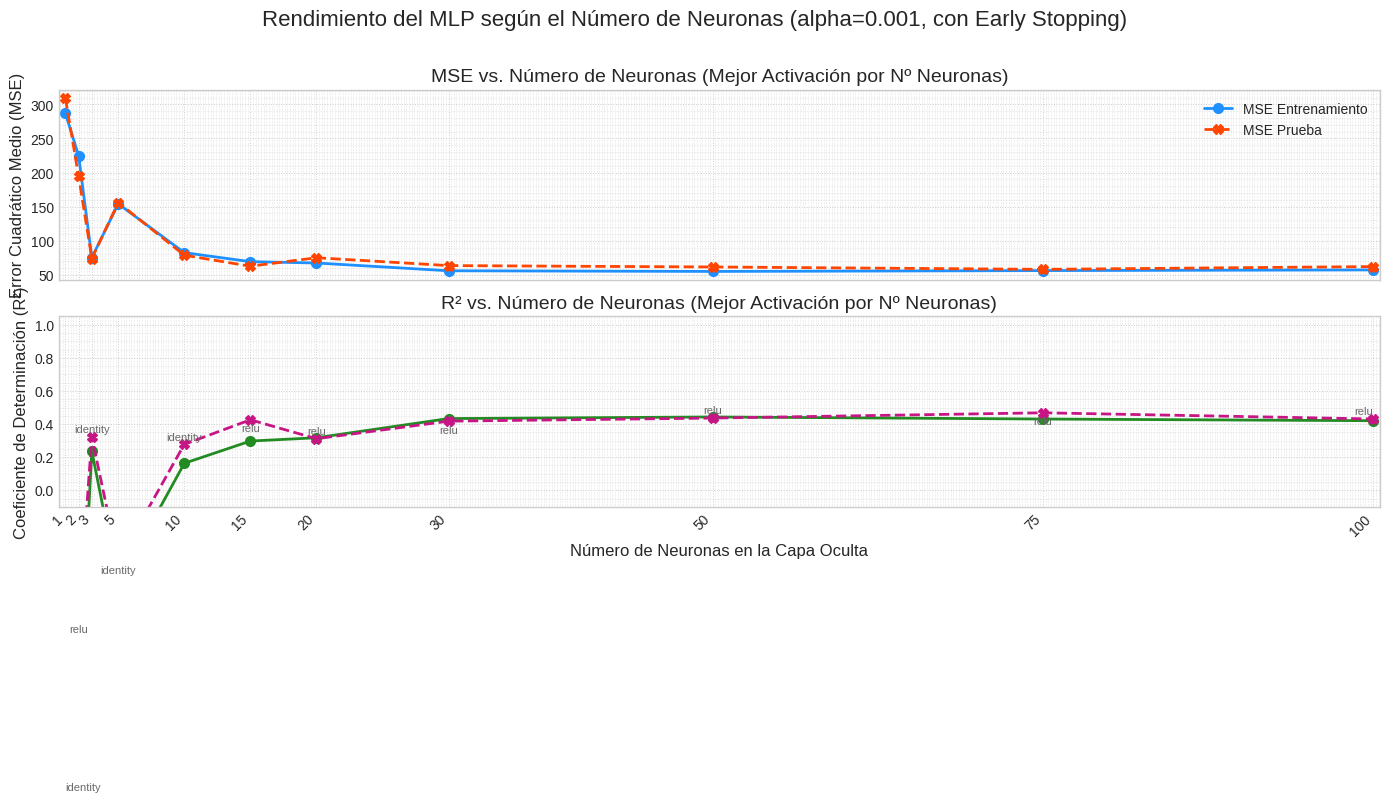

In [ ]:
# --- 2.4.7 Graficar MSE y R² para los “Mejores” Modelos ---
print("\n--- Sección 2.4.7: ¡A Graficar! Visualizando el Rendimiento ---")

# Verificamos que existan valores para el eje X (número de neuronas) antes de graficar
if eje_x_neuronas_valores:  # Si la lista no está vacía
    # Creamos una figura con dos subplots (ax1 y ax2), uno encima del otro,
    # con tamaño de figura ancho 14 y alto 11, compartiendo eje X
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 11), sharex=True)

    # --- Gráfico 1: Error Cuadrático Medio (MSE) ---
    # Trazar MSE en entrenamiento usando circulitos azules
    ax1.plot(
        eje_x_neuronas_valores,    # Coordenadas X (número de neuronas)
        mse_train_grafico,         # Coordenadas Y (MSE en entrenamiento)
        marker='o',                # Marcador en forma de círculo
        linestyle='-',             # Línea continua
        color='dodgerblue',        # Color azul para entrenamiento
        linewidth=2,               # Ancho de línea
        markersize=7,              # Tamaño del marcador
        label='MSE Entrenamiento'  # Etiqueta en la leyenda
    )
    # Trazar MSE en prueba usando equis rojas punteadas
    ax1.plot(
        eje_x_neuronas_valores,    # Coordenadas X (mismos valores de neuronas)
        mse_test_grafico,          # Coordenadas Y (MSE en prueba)
        marker='X',                # Marcador en forma de equis
        linestyle='--',            # Línea punteada
        color='orangered',         # Color rojo anaranjado para prueba
        linewidth=2,               # Ancho de línea
        markersize=7,              # Tamaño del marcador
        label='MSE Prueba'         # Etiqueta en la leyenda
    )
    ax1.set_ylabel('Error Cuadrático Medio (MSE)', fontsize=12)  # Etiqueta del eje Y
    ax1.set_title(
        'MSE vs. Número de Neuronas (Mejor Activación por Nº Neuronas)',
        fontsize=14
    )  # Título del subplot 1
    ax1.legend(fontsize=10)          # Mostrar la leyenda con tamaño de letra 10
    ax1.grid(True, which='major', linestyle=':', linewidth=0.7)  # Líneas de grid mayores punteadas
    ax1.grid(True, which='minor', linestyle=':', linewidth=0.4)  # Líneas de grid menores punteadas
    ax1.minorticks_on()              # Activar marcas menores en el eje

    # --- Gráfico 2: Coeficiente de Determinación (R²) ---
    # Trazar R² en entrenamiento usando círculos verdes
    ax2.plot(
        eje_x_neuronas_valores,   # Coordenadas X (número de neuronas)
        r2_train_grafico,         # Coordenadas Y (R² en entrenamiento)
        marker='o',               # Marcador en forma de círculo
        linestyle='-',            # Línea continua
        color='forestgreen',      # Color verde oscuro para entrenamiento
        linewidth=2,              # Ancho de línea
        markersize=7,             # Tamaño del marcador
        label='R² Entrenamiento'  # Etiqueta en la leyenda
    )
    # Trazar R² en prueba usando equis moradas punteadas
    ax2.plot(
        eje_x_neuronas_valores,   # Coordenadas X (mismo eje)
        r2_test_grafico,          # Coordenadas Y (R² en prueba)
        marker='X',               # Marcador en forma de equis
        linestyle='--',           # Línea punteada
        color='mediumvioletred',  # Color violeta medio para prueba
        linewidth=2,              # Ancho de línea
        markersize=7,             # Tamaño del marcador
        label='R² Prueba'         # Etiqueta en la leyenda
    )
    ax2.set_xlabel('Número de Neuronas en la Capa Oculta', fontsize=12)  # Etiqueta del eje X
    ax2.set_ylabel('Coeficiente de Determinación (R²)', fontsize=12)      # Etiqueta del eje Y
    ax2.set_title(
        'R² vs. Número de Neuronas (Mejor Activación por Nº Neuronas)',
        fontsize=14
    )  # Título del subplot 2

    # Ajustamos el límite inferior del eje Y para R²
    # Partimos de 0 (o del mínimo valor si es menor) y un tope de 1.05 para que no corte los puntos
    min_r2_val_plot = 0  # Valor inicial mínimo
    if not r2_test_grafico.empty:
        # Si hay valores en R² prueba, comparamos para tomar el menor (podría ser negativo)
        min_r2_val_plot = min(r2_test_grafico.min(), min_r2_val_plot)
    if not r2_train_grafico.empty:
        # Si hay valores en R² entrenamiento, comparamos para tomar el menor
        min_r2_val_plot = min(r2_train_grafico.min(), min_r2_val_plot)
    ax2.set_ylim(
        max(-0.1, min_r2_val_plot - 0.05),  # Límite inferior con colchón si es negativo
        1.05                               # Límite superior ligeramente por encima de 1
    )
    ax2.grid(True, which='major', linestyle=':', linewidth=0.7)  # Grid mayor punteado
    ax2.grid(True, which='minor', linestyle=':', linewidth=0.4)  # Grid menor punteado
    ax2.minorticks_on()              # Activar marcas menores en el eje

    # --- Anotaciones de la función de activación usada para cada punto en R² Test ---
    # Recorremos cada valor de neuronas para anotar su activación
    for i, neur_val in enumerate(eje_x_neuronas_valores):
        va_offset = 0.015  # Desplazamiento vertical para el texto, para evitar solapamientos
        # Alternar ubicación vertical del texto para mejorar la legibilidad
        vertical_align = 'bottom' if i % 2 == 0 else 'top'
        # Calcular la posición en Y donde se ubicará el texto:
        # si está en 'bottom', sumamos el offset; si en 'top', restamos un poco más
        if vertical_align == 'bottom':
            y_pos = r2_test_grafico.iloc[i] + va_offset
        else:
            y_pos = r2_test_grafico.iloc[i] - (va_offset * 1.5)

        # Ajustar alineación horizontal del texto en los extremos para que no se corte
        if neur_val == eje_x_neuronas_valores[0]:      # Primer punto del eje
            ha = 'left'
        elif neur_val == eje_x_neuronas_valores[-1]:   # Último punto del eje
            ha = 'right'
        else:
            ha = 'center'  # Para el resto de puntos, centrar horizontalmente

        # Colocar el texto con la función de activación correspondiente
        ax2.text(
            neur_val,                     # Coordenada X (valor del número de neuronas)
            y_pos,                        # Coordenada Y (calculada arriba)
            f"{activaciones_top_grafico[i]}",  # Texto: nombre de la activación
            fontsize=8,                   # Tamaño de letra reducido
            color='dimgray',              # Color gris oscuro para el texto
            ha=ha,                        # Alineación horizontal (left, center o right)
            va=vertical_align             # Alineación vertical (top o bottom)
        )

    # Configuramos las etiquetas del eje X para que muestren cada número de neuronas
    # Rotamos 45 grados para asegurar que no se sobrepongan
    plt.xticks(
        eje_x_neuronas_valores,           # Posiciones en X
        labels=eje_x_neuronas_etiquetas,  # Etiquetas en forma de strings
        rotation=45,                      # Rotar 45 grados
        ha="right"                        # Alineación a la derecha para legibilidad
    )

    # Agregar un pequeño margen horizontal para que los puntos extremos no queden pegados al borde
    if len(eje_x_neuronas_valores) > 1:
        # Diferencia entre los primeros dos valores, multiplicado por 0.5 para margen
        x_margin = (eje_x_neuronas_valores[1] - eje_x_neuronas_valores[0]) * 0.5
        plt.xlim(
            min(eje_x_neuronas_valores) - x_margin,
            max(eje_x_neuronas_valores) + x_margin
        )
    elif eje_x_neuronas_valores:  # Caso de un único punto
        plt.xlim(
            eje_x_neuronas_valores[0] - 1,
            eje_x_neuronas_valores[0] + 1
        )

    # Ajustamos el layout para que no se corte ningún elemento y dejamos espacio para el supertítulo
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # Título general de la figura con información de alpha y uso de Early Stopping
    fig.suptitle(
        'Rendimiento del MLP según el Número de Neuronas (alpha=0.001, con Early Stopping)',
        fontsize=16,
        y=0.99
    )
    # Mostrar la figura final con ambos subplots
    plt.show()

else:
    # Si no hay datos disponibles, mostrar mensaje de error en consola
    print("🚫 No se pueden generar gráficas: no hay datos disponibles para el eje X.")


###📈 Sección 2.4.7: Visualizando la Búsqueda del "Punto Óptimo"
¡Aquí están los gráficos que resumen nuestra exploración! Estos gráficos son cruciales porque nos permiten "ver" cómo cambia el rendimiento del modelo a medida que ajustamos el número de neuronas. Tenemos dos vistas principales: una para el Error Cuadrático Medio (MSE) y otra para el Coeficiente de Determinación (R²). En ambos, el eje horizontal representa el número de neuronas que pusimos en la capa oculta de nuestra red. Recuerda que cada punto en estas curvas representa el "mejor" modelo que encontramos para esa cantidad específica de neuronas (es decir, con la función de activación que dio el R² de prueba más alto).

**Interpretando el Gráfico de MSE (Arriba):**

* La línea azul (MSE Entrenamiento) muestra cómo el error en los datos de entrenamiento tiende a bajar o quedarse bajo a medida que añadimos más neuronas. Esto tiene sentido: un modelo más complejo (con más "capacidad de aprendizaje") puede ajustarse mejor, o incluso "memorizar", los datos con los que aprende.
* La línea roja (MSE Prueba) es la que más nos interesa para juzgar qué tan bien generaliza el modelo. Vemos que al principio, con pocas neuronas (por ejemplo, al pasar de 1 a unas 15-30, dependiendo de los datos), el error en los datos de prueba disminuye notablemente. ¡Buenas noticias! El modelo está aprendiendo patrones útiles y generalizando mejor.
* Pero luego, observa si la curva roja tiende a aplanarse o incluso a subir ligeramente después de cierto punto. Ese punto donde deja de mejorar drásticamente es el famoso "codo" (o el inicio de una "meseta"). Significa que añadir más neuronas después de este punto ya no reduce significativamente el error en datos nuevos. De hecho, si no tuviéramos la parada temprana y la regularización, esta curva podría empezar a subir bruscamente, indicando sobreajuste. En nuestro caso, si se mantiene estable o sube muy poco, es una buena señal de que la regularización está funcionando. El objetivo es encontrar el punto con el MSE de prueba más bajo posible antes de que se estabilice o empeore.

**Interpretando el Gráfico de R² (Abajo):**

* La línea verde (R² Entrenamiento) generalmente se mantiene alta o aumenta, indicando que el modelo se ajusta bien a los datos de entrenamiento.
* La línea morada (R² Prueba) es la clave aquí. Esperamos ver un comportamiento similar al MSE de prueba, pero inverso (queremos un R² alto):
  * Al aumentar las neuronas desde pocas hasta un número óptimo, el R² de prueba sube, lo que significa que el modelo explica cada vez mejor la variación en los datos nuevos.
  * Eventualmente, el R² de prueba alcanzará su punto máximo (o casi) y luego se estabilizará o podría empezar a decaer si el modelo comienza a sobreajustar. Este punto de máxima efectividad o inicio de la meseta es nuestro "codo" para R².
* Las pequeñas etiquetas de texto (relu, tanh, etc.) junto a los puntos de la curva de R² de prueba nos recuerdan qué función de activación fue la "ganadora" para cada cantidad de neuronas. Presta atención a qué activación domina en la zona de mejor rendimiento.

**Conclusión de los Gráficos:**
Ambos gráficos nos ayudan a identificar visualmente un rango "óptimo" para el número de neuronas. Buscamos el punto (o rango) donde el MSE de prueba es más bajo y el R² de prueba es más alto, justo antes de que las curvas se aplanen o empiecen a indicar un rendimiento decreciente en la generalización. Esta exploración visual es fundamental para tomar decisiones informadas sobre la arquitectura de nuestra red neuronal y lograr un modelo que no solo aprenda, sino que también funcione bien en situaciones nuevas.